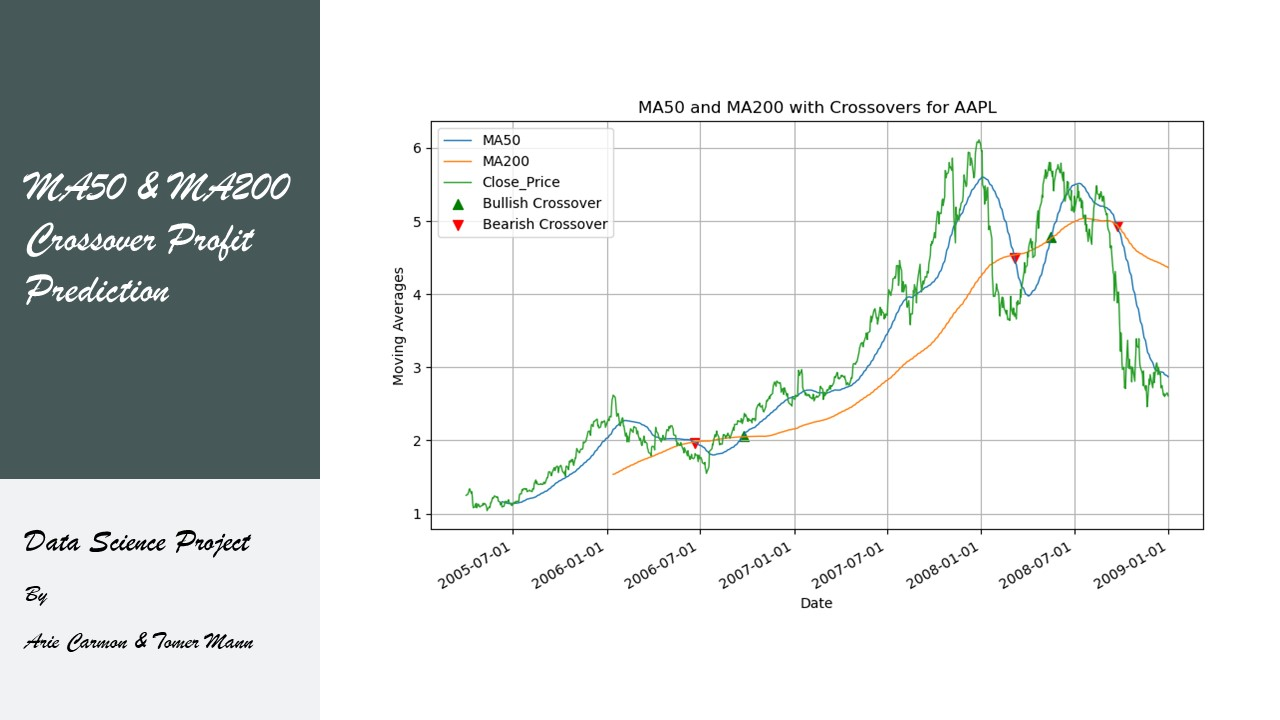

<a id="there_you_go_20"></a>
### Content
* [**Introduction**](#there_you_go_1)
* [**Project workflow**](#there_you_go_2)
* [**The Data**](#there_you_go_0)
* [**The final iteration**](#there_you_go_3)
    * [Understanding the source data](#there_you_go_4)
    * [Analyzing the dates and creating continuous sub-periods](#there_you_go_5)
    * [Removing and adding features](#there_you_go_6)
    * [Creating the ma50_cross_df](#there_you_go_7)
    * [Exploring the data in ma50_cross_df](#there_you_go_8)
    * [Dealing with zeros and NaNs](#there_you_go_9)
    * [Removing outliers](#there_you_go_10)
    * [Researching the Target and relationships between features](#there_you_go_11)
    * [Creating the Train DF - X and the Target - y](#there_you_go_12)
    * [Applying ML models and prediction](#there_you_go_13)
* [**Conclusion and summary**](#there_you_go_14)

* [**Appendix**](Profitable_Trades_Predictions_by_MA50_MA200_Crossovers_Appendix_V2.ipynb)

<a id="there_you_go_1"></a>

## <font color='blue'>*Introduction - Predicting profitability in stocks using Moving Average Crossovers*


The crossing of the 50-day moving average (MA50) over the 200-day moving average (MA200) is a significant event in technical analysis. This event is widely used by traders and analysts to identify potential changes in the overall trend of a financial instrument, such as a stock or an index.

* The MA50 is the average of a security's closing prices over the past 50 days, and the MA200 is the average over the past 200 days.
* Moving averages are used to smooth out short-term price fluctuations and highlight longer-term trends.

In this machine learning project, we took a comprehensive dataset spanning 20 years of S&P stocks.  We transformed this dataset into a collection of events, each characterized by specific features derived from companies' financial ratios, such as Current Ratio, Debt/Equity Ratio, Gross Margin, and others. The preliminary step in our analysis of the source dataset was the identification of instances where the Moving Average 50 (MA50) crosses the Moving Average 200 (MA200), commonly known as "crossover events."

The **question** to be answered in our research by using the ML model is:

***Is a given “crossover event” for a specific stock, based on the company’s ratios in the dataset which we used to train the model, can be used for predicting profitable trades?***

Dataset Overview

* Event-Centric Approach: We treated each  MA50 and  MA200 crossover as a distinct event,  capturing the  essential features of the associated companies at that  point in time.
<br><br>
* Financial Ratios: The source dataset incorporates fundamental ratios  providing insights into  the  companies' financial health, performance, and  valuation metrics.


The source dataset included more than 1 million records of data for 321 stocks from the S&P Index and 22 columns of financial ratios in addition to each stock’s trading info (price and volume) for a period of about 20 years.


This dataset was processed in order to get the desired dataset for the project including only the crossover events.

We preprocessed this source dataset, isolating instances of MA50 crossing MA200 and crafting a dataset of 5,705 “crossover events” and the respective financial ratios for each event.  A binary label was assigned to each event, indicating whether the crossover event is bullish (1) or bearish (-1).


<a id="there_you_go_2"></a>
## <font color='blue'>*Project workflow*

In the flowchart we describe the main steps and decision points in the project's process.
 
In steps 1 & 2 we first looked at the source dataset, understood its structure and the various features (will be detailed later), figuring out what we want to define as our topic, or question, to be researched.
<br>Most of the work done in these steps was towards working on time series data, which ended NOT as the prferred direction for the project, so we'll skip any additional details on these steps and go to step 3 and forward.

Steps 3 to 6 were performed in 2 iterations:

* 1. In this 1st iteration we performed all the stages from data preperation (based on the previous steps) to prediction models in a "quick and dirty" approach in order to see some prediction results and models' performances. The poor results we got made us go for another iteration looking for ways to improve the results. 


* 2. The 2nd and last iteration for getting to the point of selecting a prediction model is the process which we present here in details.


By the end of the model's selection stage we added an "appendix" step, for which we needed to complete the values of the newly added feature (% Change) also for the non-profitable crossover events. Also this step is presented in details, however it is in a seperate notebook.


### ***Flowchart showing the workflow of the project***
<br><br>

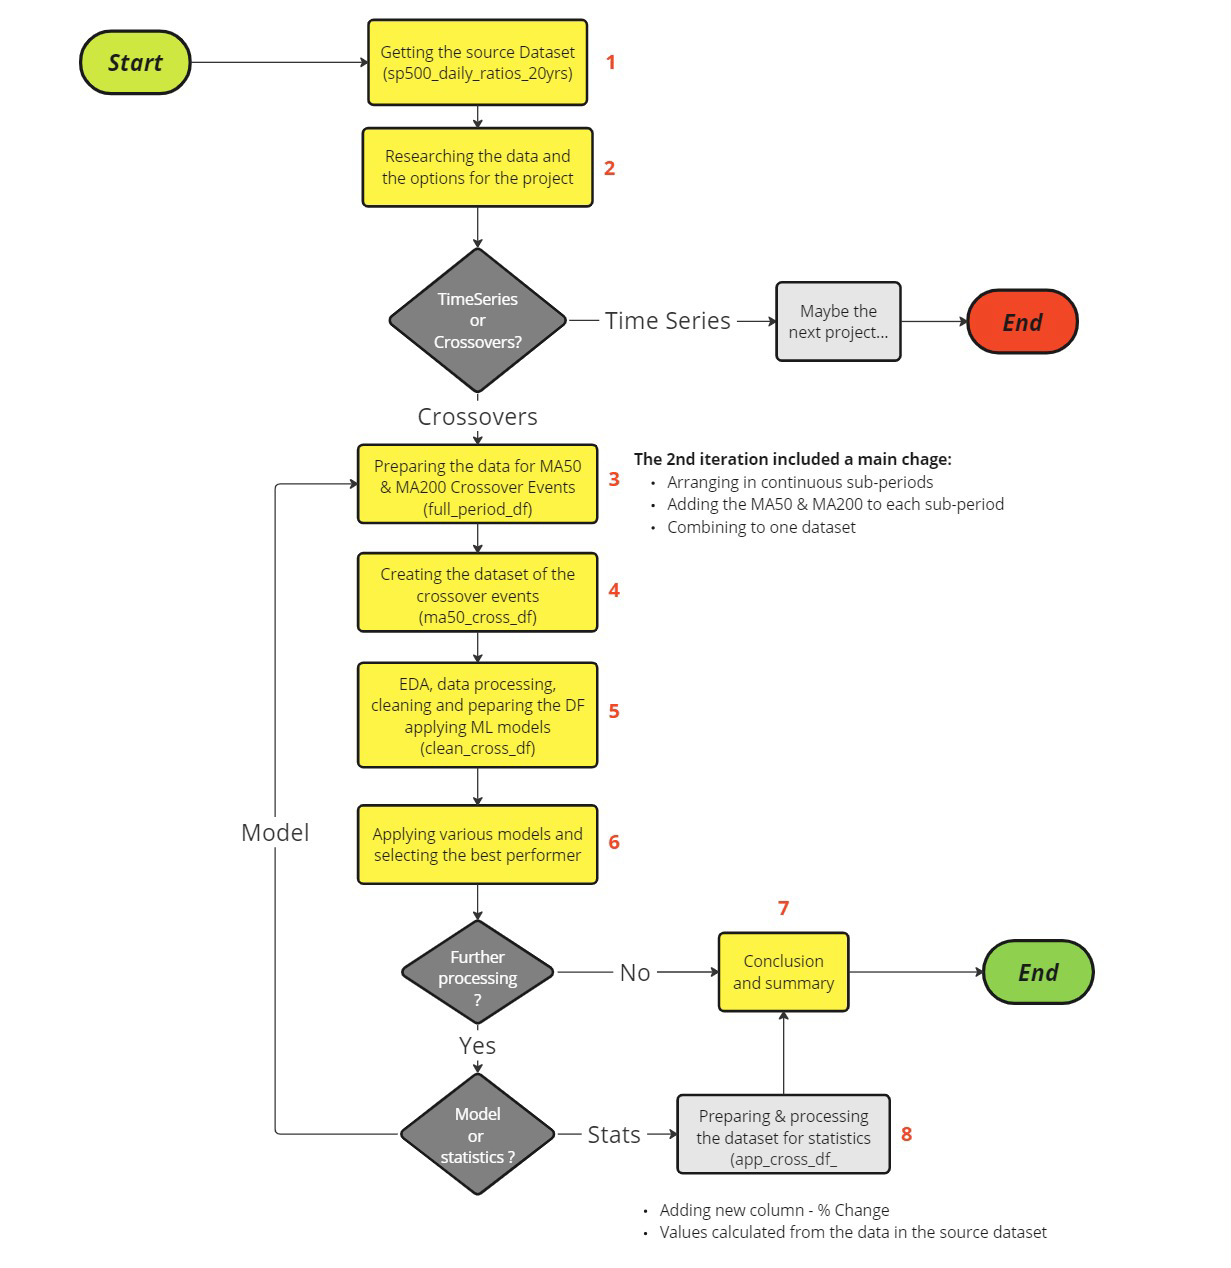

<a id="there_you_go_0"></a>
## <font color='blue'>*The Data*

The link to the source dataset

https://huggingface.co/datasets/pmoe7/SP_500_Stocks_Data-ratios_news_price_10_yrs/blob/main/sp500_daily_ratios_20yrs.zip


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_3"></a>
## <font color='blue'>*The final iteration*

### Importing libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
from datetime import datetime
import math

# Modelling Algorithms

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Modelling Helpers
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


# Preprocessing
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
import missingno as msno


# Evaluation metrics

import sklearn.metrics as skmet

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, log_loss, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Visualisation
#import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.dates as mdates # needed for plotting x-ticks with intervals
from matplotlib.ticker import MultipleLocator # needed for plotting x-ticks with intervals
import sweetviz as sv
import seaborn as sns
sns.set()
#plt.style.use('seaborn')
#plt.style.use('fivethirtyeight')

After concluding from the previous steps (as explained above) of dealing with the MA50 and MA200 crossovers and getting poor results, it's time to go back and improve the dataset.

* The first action seems to **split the original dataset to 3 continuous periods** as opposed to the previous approach - using it as one period based on the idea that I anyway plan to pick up only events and not a time series. It must have distorted the moving average values.

In [2]:
# Creating the basic original DF from the source dataset
df = pd.read_csv('sp500_daily_ratios_20yrs.csv')
print(df.shape)
df.head(1)

(1048575, 23)


Ticker        Date   Open  Close   Volume  quarter  year  Asset Turnover  \
0      A  2005-04-01  13.88  13.67  4717800        2  2005          0.1758   

   Current Ratio  Days Sales In Receivables  ...  Gross Margin  \
0         2.7269                    67.8873  ...       50.0783   

   Inventory Turnover Ratio  Long-term Debt / Capital  Net Profit Margin  \
0                     0.666                    0.2291             7.4335   

   Operating Margin  Pre-Tax Profit Margin  ROA - Return On Assets  \
0            3.2864                 4.4601                  0.7292   

   ROE - Return On Equity  Receiveable Turnover  Return On Tangible Equity  
0                  1.3699                1.3257                     1.5538  

[1 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Ticker                     1048575 non-null  object 
 1   Date                       1048575 non-null  object 
 2   Open                       1048575 non-null  float64
 3   Close                      1048575 non-null  float64
 4   Volume                     1048575 non-null  int64  
 5   quarter                    1048575 non-null  int64  
 6   year                       1048575 non-null  int64  
 7   Asset Turnover             1048575 non-null  float64
 8   Current Ratio              1048575 non-null  float64
 9   Days Sales In Receivables  1048575 non-null  float64
 10  Debt/Equity Ratio          1048575 non-null  float64
 11  EBIT Margin                1048575 non-null  float64
 12  EBITDA Margin              1048575 non-null  int64  
 13  Gross Margin


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_4"></a>
### Understanding the source data

* **Ticker** - A unique symbol or code representing a publicly traded company on a stock exchange.
* **Date** - The date of the trading day (row's data)
* **Open** - The stock's price at the openning of the trading day
* **Close** - The stock's price at the closing of the trading day
* **Volume** - The number of shares traded on the trading day
* **quarter** - The quarter in the year of the trading day
* **year** - The year of the trading day
* **Asset Turnover** - The ratio between the company's net sales (or revenue) and its average assets value for the sales period. It measures a company's ability to generate revenue relative to its total assets.
* **Current Ratio** - The ratio between the company's current assets and its current liabilities. It indicates a company's ability to cover its short-term liabilities with its short-term assets.
* **Days Sales In Receivables** - Measures the average number of days it takes for a company to collect payment after a sale.
* **Debt/Equity Ratio** - Debt-to-equity (D/E) ratio is used to evaluate a company’s financial leverage and is calculated by dividing a company’s total liabilities by its shareholder equity. It represents the proportion of a company's financing that comes from debt compared to equity.
* **EBIT Margin** - Earnings Before Interest and Taxes margin, indicating the percentage of gross profit relative to revenue.
* **EBITDA Margin** - The ratio between Earnings Before Interest, Taxes, Depreciation, and Amortization margin, and the net sales (or revenue). It indicates operating profitability.
* **Gross Margin** - The ratio between the revenue and the difeerence between the revenue and the cost of the sold goods/service. It represents the percentage of revenue that exceeds the cost of goods/services sold.
* **Inventory Turnover Ratio** - The ratio between the Cost of Goods Sold and the average inventory. It measures how many times a company's inventory is sold and replaced over a period.
* **Long-term Debt/Capital** - The ratio of a company's long-term debt to its total capital.
* **Net Profit Margin** - The ratio between the net profit and total sales (or rvenue). It shows the percentage of profit a company retains from its total revenue after all expenses.
* **Operating Margin** - Indicates the percentage of profit a company makes on its core operations.This feature is very similar to EBIT Margin and will be looked at as a potential drop from the dataset.
* **Pre-Tax Profit Margin** - measures the percentage of profit a company generates from its operations before accounting for taxes. Also this feature is very similar to EBIT and Operating Margin and will be looked at as a potential drop from the dataset.
* **ROA - Return On Assets** - The ratio between the compamy's net profit and its average assets value. It measures a company's ability to generate profit from its assets.
* **ROE - Return On Equity** -  The ratio between the company's net profit and the average shareholders equity. Represents the profitability of a company in relation to its equity.
* **Receivable Turnover** - The ratio between the total sales made on credit (less returns) and the average amount in accounts receivable. It indicates how quickly a company collects payment for its sales on credit.
* **Return On Tangible Equity** - The ratio between the company's net income and its tangible equity, which is its total equity less it intangible assets such as goodwill.



<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_5"></a>
### Analyzing the dates and creating continuous sub-periods

#### Looking for missing periods (gaps in dates) in the full span of dates in the source dataset

In [4]:
# Converting the date strings to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Specifying the minimum number of days difference to be checked for any possible gap
min_days_difference = 5

# Grouping by 'Stock' column and iterating through each group
for stock, group in df.groupby('Ticker'):
    stock_dates = group['Date'].sort_values()

    # Checking for missing periods longer than the min_days_difference
    for i in range(1, len(stock_dates)):
        time_difference = (stock_dates.iloc[i] - stock_dates.iloc[i - 1]).days
        if time_difference > min_days_difference:
            print(f"Stock: {stock}, Difference of {time_difference} days between {stock_dates.iloc[i - 1]} and {stock_dates.iloc[i]}")


Stock: A, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: A, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: AAL, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: AAL, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: AAP, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: AAP, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: AAPL, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: AAPL, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: ABC, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: ABC, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: ABMD, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: ABMD, Difference of 274 days between 

Stock: BA, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: BA, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: BAC, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: BAC, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: BAX, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: BAX, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: BBY, Difference of 547 days between 2008-12-31 00:00:00 and 2010-07-01 00:00:00
Stock: BBY, Difference of 366 days between 2013-09-30 00:00:00 and 2014-10-01 00:00:00
Stock: BDX, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: BDX, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: BEN, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: BEN, Difference of 274 days between 20

Stock: COST, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: COST, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: CPB, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: CPB, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: CPRT, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: CPRT, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: CRM, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: CRM, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: CSCO, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: CSCO, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: CSX, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: CSX, Difference of 274 days be

Stock: ES, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: ES, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: ESS, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: ESS, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: ETN, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: ETN, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: ETR, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: ETR, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: EVRG, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: EVRG, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: EW, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: EW, Difference of 274 days between 20

Stock: HPQ, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: HPQ, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: HRL, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: HRL, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: HSIC, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: HSIC, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: HST, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: HST, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: HSY, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: HSY, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: HUM, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: HUM, Difference of 274 days betwee

Stock: LMT, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: LMT, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: LNC, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: LNC, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: LNT, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: LNT, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: LOW, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: LOW, Difference of 184 days between 2014-03-31 00:00:00 and 2014-10-01 00:00:00
Stock: LRCX, Difference of 369 days between 2008-12-31 00:00:00 and 2010-01-04 00:00:00
Stock: LRCX, Difference of 274 days between 2013-12-31 00:00:00 and 2014-10-01 00:00:00
Stock: LUMN, Difference of 98 days between 2020-06-12 00:00:00 and 2020-09-18 00:00:00
Stock: LUV, Difference of 369 days betwee

In [5]:
# Checking the number of rows each stock has in the source dataset
# Grouping the dataset by 'Ticker' and count the number of rows for each group
stock_rows_counts = df['Ticker'].value_counts().reset_index()

# Renaming the columns
stock_rows_counts.columns = ['Ticker', 'Number of rows']
print(stock_rows_counts)
print(stock_rows_counts.info())
stock_rows_counts.head()

    Ticker  Number of rows
0       GS            3591
1     CSCO            3524
2      HPQ            3524
3     COST            3524
4      CPB            3524
..     ...             ...
316    FTV            1069
317    HWM             985
318     LW             978
319     IR             853
320   LUMN              69

[321 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ticker          321 non-null    object
 1   Number of rows  321 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.1+ KB
None


Ticker  Number of rows
0     GS            3591
1   CSCO            3524
2    HPQ            3524
3   COST            3524
4    CPB            3524

In [6]:
# Checking how many stocks we have with the same number of rows
stock_rows_counts['Number of rows'].value_counts()

Number of rows
3463    234
3524     23
3275      2
3591      1
2219      1
       ... 
2808      1
2735      1
2626      1
2593      1
69        1
Name: count, Length: 65, dtype: int64

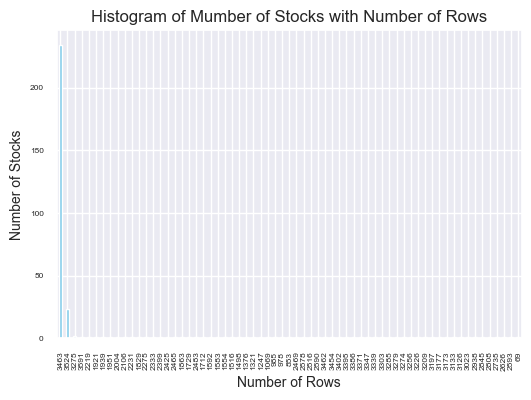

In [7]:
# Plotting a histogram of unique values in the 'Number of rows' column
plt.figure(figsize=(6, 4))
stock_rows_counts['Number of rows'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Mumber of Stocks with Number of Rows', fontsize=12)
plt.xlabel('Number of Rows', fontsize=10)
plt.ylabel('Number of Stocks', fontsize=10)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()


It seems that most of the stocks have 2 missing periods:

1. 369 days between 2008-12-31 and 2010-01-04
2. 274 days between 2013-12-31 and 2014-10-01

According to the rows count for each stock, 234 stocks (out of 321 in the source dataset) have 3,463 rows so we can select them from the 'stock_rows_counts' DF

Also we'll select the stocks with 3,524 rows (23 stocks) as they also have data in the sub-periods of the first selected 234 stocks.

In total we'll have at this stage 257 stocks.

In [8]:
# Extracting the stocks with the desired number of rows
desired_rows_count1 = 3463
desired_rows_count2 = 3524


# Extracting the stock names for the desired number of rows
selected_stocks1 = stock_rows_counts.loc[stock_rows_counts['Number of rows'] == desired_rows_count1, 'Ticker'].tolist()
selected_stocks2 = stock_rows_counts.loc[stock_rows_counts['Number of rows'] == desired_rows_count2, 'Ticker'].tolist()
total_number_of_stocks = len(selected_stocks1) + len(selected_stocks2)

print(f"Stocks with {desired_rows_count1} rows: \n{selected_stocks1}")
print(f'\n\nNumber of stocks with {desired_rows_count1} rows is: {len(selected_stocks1)}')

print(f"\n\nStocks with {desired_rows_count2} rows: \n{selected_stocks2}")
print(f'\n\nNumber of stocks with {desired_rows_count2} rows is: {len(selected_stocks2)}')

print(f'\n\nTotal number of stocks is: {total_number_of_stocks}')

Stocks with 3463 rows: 
['GPC', 'FLS', 'FLIR', 'GRMN', 'FITB', 'FMC', 'FISV', 'MMC', 'MHK', 'MLM', 'GLW', 'FTI', 'GOOGL', 'MKTX', 'MKC', 'GE', 'GILD', 'FIS', 'GL', 'GOOG', 'FRT', 'A', 'FFIV', 'FE', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXR', 'F', 'MO', 'FAST', 'MNST', 'MMM', 'FCX', 'HAL', 'GWW', 'HIG', 'HAS', 'HBAN', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KEY', 'MAS', 'MAR', 'KIM', 'KLAC', 'KMB', 'MAA', 'KMX', 'KO', 'KSU', 'L', 'LEG', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LRCX', 'LUV', 'JBHT', 'J', 'IVZ', 'IBM', 'MGM', 'HES', 'HFC', 'DXC', 'MET', 'HOLX', 'HON', 'MDLZ', 'HSIC', 'HST', 'HSY', 'HUM', 'MCO', 'IDXX', 'ITW', 'IEX', 'IFF', 'ILMN', 'INCY', 'MCK', 'INTC', 'IP', 'IPG', 'MCHP', 'MCD', 'IRM', 'ISRG', 'IT', 'EA', 'DVA', 'DVN', 'CAH', 'AOS', 'APA', 'APD', 'APH', 'MXIM', 'ARE', 'ATO', 'ATVI', 'AVB', 'MU', 'AVY', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BDX', 'BEN', '

#### Creating continuous sub-periods datasets

In [9]:
# Combining the 2 lists of stocks to be included in the desired dataset
list_of_stocks = selected_stocks1 + selected_stocks2
len(list_of_stocks)

257

In [10]:
# Creating the DF which contains only the selected stocks
sel_sto_df = df[df['Ticker'].isin(list_of_stocks)]

sel_sto_df.shape

(891394, 23)

#### Viewing an example of a specific stock's price for the full period in the selected stocks dataset

In [11]:
# Setting the 'Ticker' variable
ticker = 'AAPL'

# Creating a function to generate the stock subset using the global 'ticker' variable
def get_stock_subset(df):
    return sel_sto_df[sel_sto_df['Ticker'] == ticker].copy()
    

# Creating the stock subset using the 'ticker' variable
specific_stock_df = get_stock_subset(sel_sto_df)

# Printing the selected stock's name
print(f"The following output is for the stock Ticker: {ticker}")

The following output is for the stock Ticker: AAPL


In [12]:
specific_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3463 entries, 10265 to 13727
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Ticker                     3463 non-null   object        
 1   Date                       3463 non-null   datetime64[ns]
 2   Open                       3463 non-null   float64       
 3   Close                      3463 non-null   float64       
 4   Volume                     3463 non-null   int64         
 5   quarter                    3463 non-null   int64         
 6   year                       3463 non-null   int64         
 7   Asset Turnover             3463 non-null   float64       
 8   Current Ratio              3463 non-null   float64       
 9   Days Sales In Receivables  3463 non-null   float64       
 10  Debt/Equity Ratio          3463 non-null   float64       
 11  EBIT Margin                3463 non-null   float64       
 12  EBITDA

#### Plotting a graph of the selected stock's price for the full period

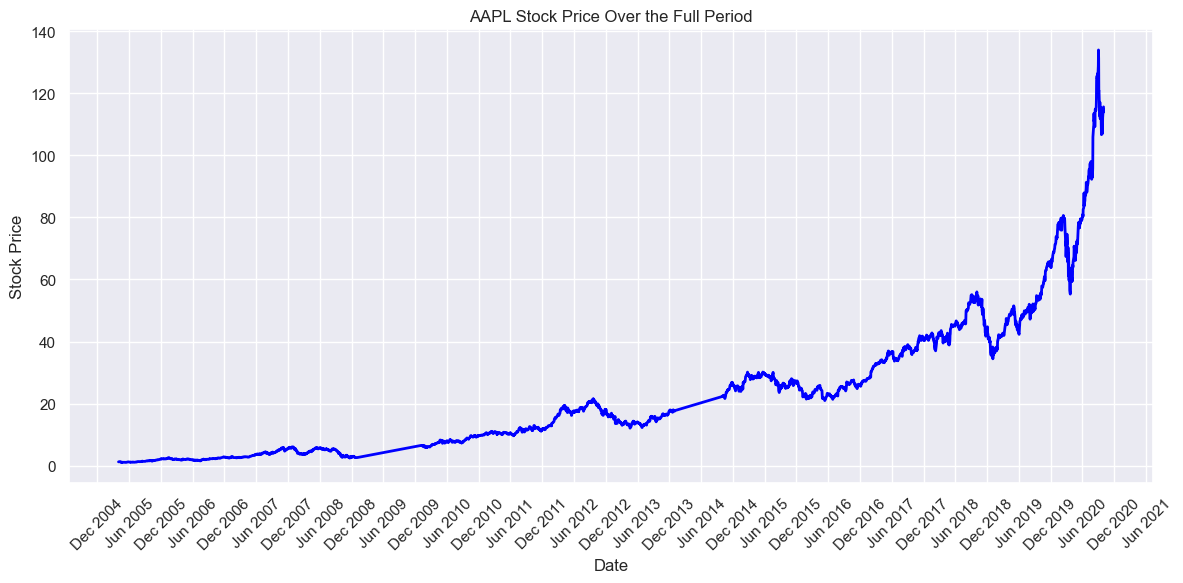

In [13]:
# Extracting date and stock price columns
dates = specific_stock_df['Date']
price = specific_stock_df['Close']

# Creating a line graph
plt.figure(figsize=(12, 6))
plt.plot(dates, price, label='Stock (Close) Price', color='blue', linewidth=2)

# Adding labels and a title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Stock Price Over the Full Period')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Setting x-ticks at specific intervals (e.g., every 6 months)
interval = 6
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=interval))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

##### <font color='blue'>The 2 periods of missing data are clearly seen on the plot - straight lines

**The full period of the original DF is:**
* From 4.1.2005 to 30.9.2020

**The 3 continuous sub_periods are:**
1. From 4.1.2005 to 31.12.2008
2. From 4.1.2010 to 31.12.2013
3. From 10.1.2014 to 30.9.2020

#### Splitting the full period DF to 3 sub-periods

In [14]:
# 1st sub-period

# Specifying the desired sub-period number 1
start_date = '2005-01-04'
end_date = '2008-12-31'

# Grouping by 'Ticker'
grouped_stocks_df = sel_sto_df.groupby('Ticker')

# Initializing an empty list to store the stocks' sub-period DataFrames
sub_period_dfs = []

# Iterating over each group (each stock)
for name, group in grouped_stocks_df:
    # Filtering the group based on the desired sub-period
    sub_period_group = group[(group['Date'] >= start_date) & (group['Date'] <= end_date)]
    
    # Appending the sub-period DataFrame to the list
    sub_period_dfs.append(sub_period_group)

# Concatenating the list of sub-period DataFrames into a single DataFrame
sub_per_df1 = pd.concat(sub_period_dfs)

# Resetting the index while keeping the original index as a new column
sub_per_df1 = sub_per_df1.reset_index(drop=False)
    
print("DataFrame for the desired sub-period number 1:")
print("------------------------------------------------")
sub_per_df1.info()
 

DataFrame for the desired sub-period number 1:
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243122 entries, 0 to 243121
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      243122 non-null  int64         
 1   Ticker                     243122 non-null  object        
 2   Date                       243122 non-null  datetime64[ns]
 3   Open                       243122 non-null  float64       
 4   Close                      243122 non-null  float64       
 5   Volume                     243122 non-null  int64         
 6   quarter                    243122 non-null  int64         
 7   year                       243122 non-null  int64         
 8   Asset Turnover             243122 non-null  float64       
 9   Current Ratio              243122 non-null  float64       
 10  Days Sales In Receiv

In [15]:
print('Start Date is:', sub_per_df1['Date'][0])
print('End Date is:', sub_per_df1['Date'][243121])

Start Date is: 2005-04-01 00:00:00
End Date is: 2008-12-31 00:00:00


In [16]:
# 2nd sub-period

# Specifying the desired sub-period number 2
start_date = '2010-01-04'
end_date = '2013-12-31'

# Grouping by 'Ticker'
grouped_stocks_df = sel_sto_df.groupby('Ticker')

# Initializing an empty list to store the stocks' sub-period DataFrames
sub_period_dfs = []

# Iterating over each group (each stock)
for name, group in grouped_stocks_df:
    # Filtering the group based on the desired sub-period
    sub_period_group = group[(group['Date'] >= start_date) & (group['Date'] <= end_date)]
    
    # Appending the sub-period DataFrame to the list
    sub_period_dfs.append(sub_period_group)

# Concatenating the list of sub-period DataFrames into a single DataFrame
sub_per_df2 = pd.concat(sub_period_dfs)

# Resetting the index while keeping the original index as a new column
sub_per_df2 = sub_per_df2.reset_index(drop=False)
    
print("DataFrame for the desired sub-period number 2:")
print("------------------------------------------------")
sub_per_df2.info()
 

DataFrame for the desired sub-period number 2:
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258542 entries, 0 to 258541
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      258542 non-null  int64         
 1   Ticker                     258542 non-null  object        
 2   Date                       258542 non-null  datetime64[ns]
 3   Open                       258542 non-null  float64       
 4   Close                      258542 non-null  float64       
 5   Volume                     258542 non-null  int64         
 6   quarter                    258542 non-null  int64         
 7   year                       258542 non-null  int64         
 8   Asset Turnover             258542 non-null  float64       
 9   Current Ratio              258542 non-null  float64       
 10  Days Sales In Receiv

In [17]:
print('Start Date is:', sub_per_df2['Date'][0])
print('End Date is:', sub_per_df2['Date'][258541])

Start Date is: 2010-01-04 00:00:00
End Date is: 2013-12-31 00:00:00


In [18]:
# 3rd sub-period

# Specifying the desired sub-period number 3
start_date = '2014-10-01'
end_date = '2020-09-30'

# Grouping by 'Ticker'
grouped_stocks_df = sel_sto_df.groupby('Ticker')

# Initializing an empty list to store the stocks' sub-period DataFrames
sub_period_dfs = []

# Iterating over each group (each stock)
for name, group in grouped_stocks_df:
    # Filtering the group based on the desired sub-period
    sub_period_group = group[(group['Date'] >= start_date) & (group['Date'] <= end_date)]
    
    # Appending the sub-period DataFrame to the list
    sub_period_dfs.append(sub_period_group)

# Concatenating the list of sub-period DataFrames into a single DataFrame
sub_per_df3 = pd.concat(sub_period_dfs)

# Resetting the index while keeping the original index as a new column
sub_per_df3 = sub_per_df3.reset_index(drop=False)
    
print("DataFrame for the desired sub-period number 3:")
print("------------------------------------------------")
sub_per_df3.info()
 

DataFrame for the desired sub-period number 3:
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388327 entries, 0 to 388326
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      388327 non-null  int64         
 1   Ticker                     388327 non-null  object        
 2   Date                       388327 non-null  datetime64[ns]
 3   Open                       388327 non-null  float64       
 4   Close                      388327 non-null  float64       
 5   Volume                     388327 non-null  int64         
 6   quarter                    388327 non-null  int64         
 7   year                       388327 non-null  int64         
 8   Asset Turnover             388327 non-null  float64       
 9   Current Ratio              388327 non-null  float64       
 10  Days Sales In Receiv

In [19]:
print('Start Date is:', sub_per_df3['Date'][0])
print('End Date is:', sub_per_df3['Date'][388326])

Start Date is: 2014-10-01 00:00:00
End Date is: 2020-09-30 00:00:00



<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_6"></a>
### Removing and adding features

This processing needs to be done before combining the 3 sub-periods to a one ("full") DF in order  to get the MA50 and NA200 calculated properly.

#### The following features are to be removed:
[based on assesment (during previous data processing stages) of being irrelevant for the model or previous processing results]

* **year** - Removed as irrelevant.
* **EBIT Margin** - Removed as almost same as Operating Margin.
* **EBITDA Margin** - Removed as having too many zero values suspected to replace "Not Available".
* **Pre-Tax Profit Margin** - Removed as almost same as Operating Margin.

#### The following features are to be added:

* **Days** - number of days passed from the earliest date for each stock in the dataset.
* **MA50** and **MA200** - moving averages 50 and 200 of the Close price of a stock for the 50 and 200 days before the date they are calculated for.
* **Crossover** - an indicator for a bullish or bearish crossover of the MA50 with the MA200. 1 for bullish (from below to above), -1 for bearish (from above to below), otherwise 0 (a value of 0 means - no crossover).
* **Profitable** - indicator if the price ('Close') after a given number of days ('nd') from the crossover date was higher (for bullish crossover) or lower (for bearish crossover) than the price of the crossover date by a certain percent value ('pr'), giving value of 1 if yes (profitable) or value of 0 if not. The 'nd' and 'pr' parameters will be set after checking a few options.
* **%Change** - the percentage profit/loss for a transaction performed after a crossover event. This feature cannot and will not be part of the model's training as it adds information from the future and actually equivalent to the 'Profitable' feature. At this step its values are added only to profitable events only for the purpose of getting an idea of the theretical profit which would have achieved if the model's prediction was perfect. Later on, in the "appendix" step, we added the values also for the non-profitable crrossover events as will be shown there.

#### Removing the selected features

In [20]:
# Removing the selected features
def remove_features(dfr):
    features_to_remove = ['year', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin']
    return dfr.drop(columns=features_to_remove)
    
rem_sub_per_df1 = remove_features(sub_per_df1)
#print(rem_sub_per_df1.info())

rem_sub_per_df2 = remove_features(sub_per_df2)
#print(rem_sub_per_df2.info())

rem_sub_per_df3 = remove_features(sub_per_df3)
#print(rem_sub_per_df3.info())

#### Adding the 'Days' feature

In [21]:
# Creating the new column 'Days'

def add_days(dfd):
    # Getting the earliest date for each stock in the file- in a new DF 'earliest_dates'
    earliest_dates = dfd.groupby('Ticker')['Date'].min().reset_index()
    earliest_dates
    
    # Merging the 'earliest_dates' DF to the function's input DF
    dfd = pd.merge(dfd, earliest_dates, on='Ticker', suffixes=('', '_earliest'))
    
    # Calculating the 'Days' column as the difference in days for each stock
    dfd['Days'] = (dfd['Date'] - dfd['Date_earliest']).dt.days
    
    # Dropping the extra 'Date_earliest' column whic is not needed
    dfd.drop(columns=['Date_earliest'], inplace=True)
    
    return dfd

add1_sub_per_df1 = add_days(rem_sub_per_df1)
print(add1_sub_per_df1.info())

add1_sub_per_df2 = add_days(rem_sub_per_df2)
print(add1_sub_per_df2.info())

add1_sub_per_df3 = add_days(rem_sub_per_df3)
print(add1_sub_per_df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243122 entries, 0 to 243121
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      243122 non-null  int64         
 1   Ticker                     243122 non-null  object        
 2   Date                       243122 non-null  datetime64[ns]
 3   Open                       243122 non-null  float64       
 4   Close                      243122 non-null  float64       
 5   Volume                     243122 non-null  int64         
 6   quarter                    243122 non-null  int64         
 7   Asset Turnover             243122 non-null  float64       
 8   Current Ratio              243122 non-null  float64       
 9   Days Sales In Receivables  243122 non-null  float64       
 10  Debt/Equity Ratio          243122 non-null  float64       
 11  Gross Margin               243122 non-null  float64 

#### Adding the features 'MA50' and 'MA200' features

In [22]:
# Creating the 2 new columns MA50, MA200

def add_ma(dfm,n): # n is for the moving average window's size (in days)
    
    # Calculating the moving average and store it in a new column with a dynamic name
    column_name = f'MA{n}'
    dfm[column_name] = dfm.groupby('Ticker')['Close'].rolling(window=n).mean().reset_index(0, drop=True)
    
    return dfm
   
add2_sub_per_df1 = add_ma(add1_sub_per_df1, 50)
add2_sub_per_df1 = add_ma(add2_sub_per_df1, 200)
print(add2_sub_per_df1.info())

add2_sub_per_df2 = add_ma(add1_sub_per_df2, 50)
add2_sub_per_df2 = add_ma(add2_sub_per_df2, 200)
print(add2_sub_per_df2.info())

add2_sub_per_df3 = add_ma(add1_sub_per_df3, 50)
add2_sub_per_df3 = add_ma(add2_sub_per_df3, 200)
print(add2_sub_per_df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243122 entries, 0 to 243121
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      243122 non-null  int64         
 1   Ticker                     243122 non-null  object        
 2   Date                       243122 non-null  datetime64[ns]
 3   Open                       243122 non-null  float64       
 4   Close                      243122 non-null  float64       
 5   Volume                     243122 non-null  int64         
 6   quarter                    243122 non-null  int64         
 7   Asset Turnover             243122 non-null  float64       
 8   Current Ratio              243122 non-null  float64       
 9   Days Sales In Receivables  243122 non-null  float64       
 10  Debt/Equity Ratio          243122 non-null  float64       
 11  Gross Margin               243122 non-null  float64 

#### Adding the 'Crossover' feature

In [23]:
# Creating the new column 'Crossover'

def add_cros(dfc):
    # Detecting bullish crossovers (MA50 crosses MA200 from below to above)
    bullish_crossover = (dfc['MA50'] > dfc['MA200']) & (dfc['MA50'].shift(1) <= dfc['MA200'].shift(1))
    
    # Detecting bearish crossovers (MA50 crosses MA200 from above to below)
    bearish_crossover = (dfc['MA50'] < dfc['MA200']) & (dfc['MA50'].shift(1) >= dfc['MA200'].shift(1))
    
    # Creating a new column 'Crossover' with '1' for bullish crossovers, '-1' for bearish crossovers, and '0' otherwise
    df['Crossover'] = 0
    dfc.loc[bullish_crossover, 'Crossover'] = 1
    dfc.loc[bearish_crossover, 'Crossover'] = -1
    
    return dfc

add3_sub_per_df1 = add_cros(add2_sub_per_df1)
print(add3_sub_per_df1.info())

add3_sub_per_df2 = add_cros(add2_sub_per_df2)
print(add3_sub_per_df2.info())

add3_sub_per_df3 = add_cros(add2_sub_per_df3)
print(add3_sub_per_df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243122 entries, 0 to 243121
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      243122 non-null  int64         
 1   Ticker                     243122 non-null  object        
 2   Date                       243122 non-null  datetime64[ns]
 3   Open                       243122 non-null  float64       
 4   Close                      243122 non-null  float64       
 5   Volume                     243122 non-null  int64         
 6   quarter                    243122 non-null  int64         
 7   Asset Turnover             243122 non-null  float64       
 8   Current Ratio              243122 non-null  float64       
 9   Days Sales In Receivables  243122 non-null  float64       
 10  Debt/Equity Ratio          243122 non-null  float64       
 11  Gross Margin               243122 non-null  float64 

#### Plotting a sample of the MA50 crossings MA200 for a specific stock

In [24]:
# Setting the 'Ticker' variable
ticker = 'AAPL'

# Creating a function to generate the stock subset using the global 'ticker' variable
def get_stock_subset(dfs):
    return dfs[dfs['Ticker'] == ticker].copy()
    

# Creating the stock subset using the 'ticker' variable
specific_stock_df1 = get_stock_subset(add3_sub_per_df1)
print(specific_stock_df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 1892 to 2837
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      946 non-null    int64         
 1   Ticker                     946 non-null    object        
 2   Date                       946 non-null    datetime64[ns]
 3   Open                       946 non-null    float64       
 4   Close                      946 non-null    float64       
 5   Volume                     946 non-null    int64         
 6   quarter                    946 non-null    int64         
 7   Asset Turnover             946 non-null    float64       
 8   Current Ratio              946 non-null    float64       
 9   Days Sales In Receivables  946 non-null    float64       
 10  Debt/Equity Ratio          946 non-null    float64       
 11  Gross Margin               946 non-null    float64       
 12  Inventory

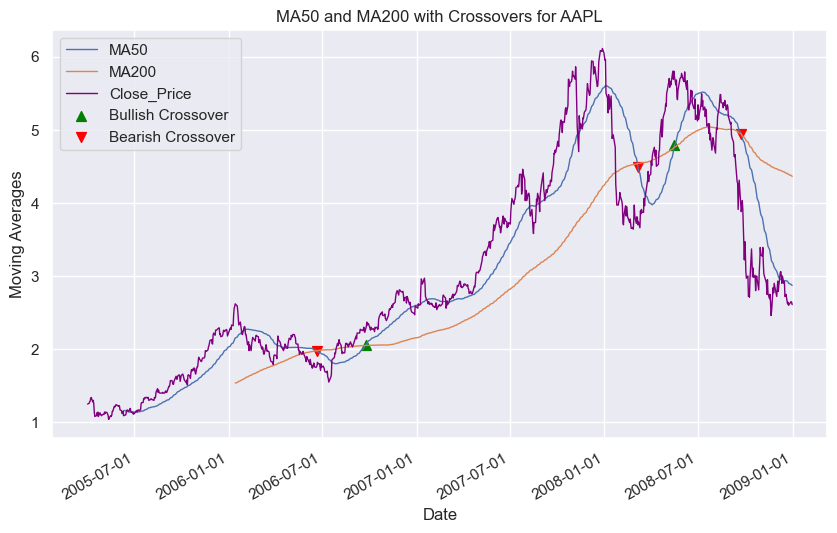

In [25]:
# Plotting the MA50 and MA200 lines
plt.figure(figsize=(10, 6))
plt.plot(specific_stock_df1['Date'], specific_stock_df1['MA50'], label='MA50', linestyle='-', linewidth=1)
plt.plot(specific_stock_df1['Date'], specific_stock_df1['MA200'], label='MA200', linestyle='-', linewidth=1)
plt.plot(specific_stock_df1['Date'], specific_stock_df1['Close'], label='Close_Price', linestyle='-', linewidth=1, color='purple')


# Plotting bullish crossovers as green arrow heads and bearish crossovers as red arrow heads
bullish_crossovers = specific_stock_df1[specific_stock_df1['Crossover'] == 1]
bearish_crossovers = specific_stock_df1[specific_stock_df1['Crossover'] == -1]

plt.scatter(bullish_crossovers['Date'], bullish_crossovers['MA50'], color='green', marker='^', label='Bullish Crossover', s=50)
plt.scatter(bearish_crossovers['Date'], bearish_crossovers['MA50'], color='red', marker='v', label='Bearish Crossover', s=50)

plt.xlabel('Date')
plt.ylabel('Moving Averages')
plt.title(f'MA50 and MA200 with Crossovers for {ticker}')
plt.legend()

# Adjusting X-axis ticks and labels using mdates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid(True)
plt.show()


#### Adding the 'Profitable' and '%Change' features

In [26]:
"""
1. The selected values for 'nd' and 'pr' are after trying some combinations and selecting
the one which gives the highest number of profitable trades.

2. The '%Change' feature's value, though it is required for all the crossover rows, is added at this stage
ONLY to the profitable crossovers. This is because in order to calculate its values a 'Close' price of the 
stock on a day which is later by 'nd' days (currently set to 30) from the crossover day is required but may 
not exist in the data. In such case the value will be NaN and later on the row will be removed. We want to 
use for the model's training as many rows as possible and anyhow this feature cannot be part of the training
as it brings information from the future, relative to the crossover day. 
It is addedd here just to check the validity of the 'Profitable' values.
"""

# Creating the new columns 'Profitable' and '%Change'

def add_profit(dfp, nd, pr):
        
    # Creating a new 'Profitable' column and initializing it with 0
    dfp['Profitable'] = 0
    
    # Iterating through the DataFrame
    for index, row in dfp.iterrows():
        
        # Finding the index of the target date 'nd' days later
        target_index = index + nd
        
        # Checking if the target index is within the DataFrame and for the same stock
        if target_index < len(dfp) and dfp.loc[target_index, 'Ticker'] == row['Ticker']:
            # Comparing the closing prices on the two dates based on 'Crossover' value
            if row['Crossover'] == 1 and dfp.loc[target_index, 'Close'] >= (row['Close'] * (1 + pr / 100)):
                dfp.at[index, 'Profitable'] = 1
                dfp.at[index, '%Change'] = (dfp.loc[target_index, 'Close'] / row['Close'] - 1) * 100
            elif row['Crossover'] == -1 and dfp.loc[target_index, 'Close'] <= (row['Close'] * (1 - pr / 100)):
                dfp.at[index, 'Profitable'] = 1
                dfp.at[index, '%Change'] = -(dfp.loc[target_index, 'Close'] / row['Close'] - 1) * 100
    return dfp


nd = 30
pr = 1

add4_sub_per_df1 = add_profit(add3_sub_per_df1, nd, pr)
print(add4_sub_per_df1.info())

add4_sub_per_df2 = add_profit(add3_sub_per_df2, nd, pr)
print(add4_sub_per_df2.info())

add4_sub_per_df3 = add_profit(add3_sub_per_df3, nd, pr)
print(add4_sub_per_df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243122 entries, 0 to 243121
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      243122 non-null  int64         
 1   Ticker                     243122 non-null  object        
 2   Date                       243122 non-null  datetime64[ns]
 3   Open                       243122 non-null  float64       
 4   Close                      243122 non-null  float64       
 5   Volume                     243122 non-null  int64         
 6   quarter                    243122 non-null  int64         
 7   Asset Turnover             243122 non-null  float64       
 8   Current Ratio              243122 non-null  float64       
 9   Days Sales In Receivables  243122 non-null  float64       
 10  Debt/Equity Ratio          243122 non-null  float64       
 11  Gross Margin               243122 non-null  float64 

In [27]:
print('Results for sub-period 1:')
print('--------------------------')
print('Value Counts of Profitable:\n', add4_sub_per_df1['Profitable'].value_counts())
print('\n\nValue Counts of %Change:', add4_sub_per_df1['%Change'].count())
print('\n\nThe average % Change is:', add4_sub_per_df1['%Change'].mean(), '%')

Results for sub-period 1:
--------------------------
Value Counts of Profitable:
 Profitable
0    242621
1       501
Name: count, dtype: int64


Value Counts of %Change: 501


The average % Change is: 11.025160454868269 %


In [28]:
print('Results for sub-period 2:')
print('--------------------------')
print('Value Counts of Profitable:\n', add4_sub_per_df2['Profitable'].value_counts())
print('\n\nValue Counts of %Change:', add4_sub_per_df2['%Change'].count())
print('\n\nThe average % Change is:', add4_sub_per_df2['%Change'].mean(), '%')

Results for sub-period 2:
--------------------------
Value Counts of Profitable:
 Profitable
0    258026
1       516
Name: count, dtype: int64


Value Counts of %Change: 516


The average % Change is: 8.06271072747772 %


In [29]:
print('Results for sub-period 3:')
print('--------------------------')
print('Value Counts of Profitable:\n', add4_sub_per_df3['Profitable'].value_counts())
print('\n\nValue Counts of %Change:', add4_sub_per_df3['%Change'].count())
print('\n\nThe average % Change is:', add4_sub_per_df3['%Change'].mean(), '%')

Results for sub-period 3:
--------------------------
Value Counts of Profitable:
 Profitable
0    387435
1       892
Name: count, dtype: int64


Value Counts of %Change: 892


The average % Change is: 7.705136268226856 %



<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_7"></a>
### Creating the ma50_cross_df
This dataset is the base of the crossover events dataset

#### Combining the sub-periods DFs to one "full" period DF

In [30]:
# Combining the DataFrames by rows
full_period_df = pd.concat([add4_sub_per_df1, add4_sub_per_df2, add4_sub_per_df3], ignore_index=True)

In [31]:
full_period_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889991 entries, 0 to 889990
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   index                      889991 non-null  int64         
 1   Ticker                     889991 non-null  object        
 2   Date                       889991 non-null  datetime64[ns]
 3   Open                       889991 non-null  float64       
 4   Close                      889991 non-null  float64       
 5   Volume                     889991 non-null  int64         
 6   quarter                    889991 non-null  int64         
 7   Asset Turnover             889991 non-null  float64       
 8   Current Ratio              889991 non-null  float64       
 9   Days Sales In Receivables  889991 non-null  float64       
 10  Debt/Equity Ratio          889991 non-null  float64       
 11  Gross Margin               889991 non-null  float64 

In [32]:
print('Results for the full period:')
print('--------------------------')
print('Value Counts of Profitable:\n', full_period_df['Profitable'].value_counts())
print('\n\nValue Counts of %Change:', full_period_df['%Change'].count())
print('\n\nThe average % Change is:', full_period_df['%Change'].mean(), '%')

Results for the full period:
--------------------------
Value Counts of Profitable:
 Profitable
0    888082
1      1909
Name: count, dtype: int64


Value Counts of %Change: 1909


The average % Change is: 8.673098834219937 %


#### <font color='blue'>*There are total of 4,385 events of crossover out of which 1,909 are profitable ('Profitable' = 1)*

#### Creating the dataset which contains only the crossover events

In [33]:
# Creating a new DataFrame with rows where 'Crossover' is '1' or '-1'
ma50_cross_df = full_period_df[full_period_df['Crossover'].isin([1, -1])]

In [34]:
ma50_cross_df = ma50_cross_df.reset_index(drop=True)
ma50_cross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4385 entries, 0 to 4384
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4385 non-null   int64         
 1   Ticker                     4385 non-null   object        
 2   Date                       4385 non-null   datetime64[ns]
 3   Open                       4385 non-null   float64       
 4   Close                      4385 non-null   float64       
 5   Volume                     4385 non-null   int64         
 6   quarter                    4385 non-null   int64         
 7   Asset Turnover             4385 non-null   float64       
 8   Current Ratio              4385 non-null   float64       
 9   Days Sales In Receivables  4385 non-null   float64       
 10  Debt/Equity Ratio          4385 non-null   float64       
 11  Gross Margin               4385 non-null   float64       
 12  Invent

***Note: The feature 'index' in this DF is the ORIGINAL INDEX in the source dataframe***

We use this feature as a row's ID so we can refer to it later while combining datasets or adding data

In [35]:
# Verifying values of '%Change' of couple of rows
ma50_cross_df.head(3)

index Ticker       Date   Open  Close   Volume  quarter  Asset Turnover  \
0    318      A 2006-07-06  19.40  19.60  2054200        3          0.1603   
1    413      A 2006-11-17  22.00  22.19  3484900        4          0.1802   
2    685      A 2007-12-19  23.08  23.34  3035600        4          0.1914   

   Current Ratio  Days Sales In Receivables  ...  ROA - Return On Assets  \
0         2.5128                    61.9613  ...                  2.7947   
1         2.5735                    46.8976  ...                  1.7099   
2         2.2075                    45.7469  ...                  2.3828   

   ROE - Return On Equity  Receiveable Turnover  Return On Tangible Equity  \
0                  5.6962                1.4525                     6.5237   
1                  3.4539                1.9191                     3.9623   
2                  5.5659                1.9673                     7.2058   

   Days     MA50     MA200  Crossover  Profitable   %Change  
0   461  21.4990  21.51925       -1.0           0       NaN  
1   595  21.0246  21.00640        1.0           1  1.937810  
2   992  24.0260  24.04805       -1.0           1  2.913453  

[3 rows x 26 columns]

In [36]:
# Checking a bullish % profit @ index = 1 of this DF and original index (in the full period DF) = 413
# The target row in the full period DF for calculating the % profit is 413 + 30 (as defined by 'nd'=30) = 443
bull_profit_pr = (full_period_df.iloc[443][4] / full_period_df.iloc[413][4] - 1) * 100

# Checking a bearish % profit @ index = 2 of this DF and original index (in the full period DF) = 685
# The target row in the full period DF for calculating the % profit is 685 + 30 (as defined by 'nd'=30) = 715
bear_profit_pr = -(full_period_df.iloc[715][4] / full_period_df.iloc[685][4] - 1) * 100

print('%Change of the bullish profit = ', bull_profit_pr, '%')
print('%Change of the bearish profit = ', bear_profit_pr, '%')

%Change of the bullish profit =  1.9378098242451625 %
%Change of the bearish profit =  2.9134532990574113 %


Good! These results agree with the values presented in the 'head' above


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_8"></a>
### Exploring the data in 'ma50_cross_df'

#### Getting a general view on the data in the new dataset

<style>
    .icon {
        font-size: 24px; /* Adjust the font size of the icon */
        cursor: pointer; /* Change cursor to pointer on hover */
        color: blue; /* Change color of the icon */
    }
</style>


In [37]:
sweet_report = sv.analyze(ma50_cross_df)
sweet_report.show_html('ma50_cross_df_sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report ma50_cross_df_sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_9"></a>
### Dealing with zeros and NaNs

#### Visualizing the mapping of the missing and zero values

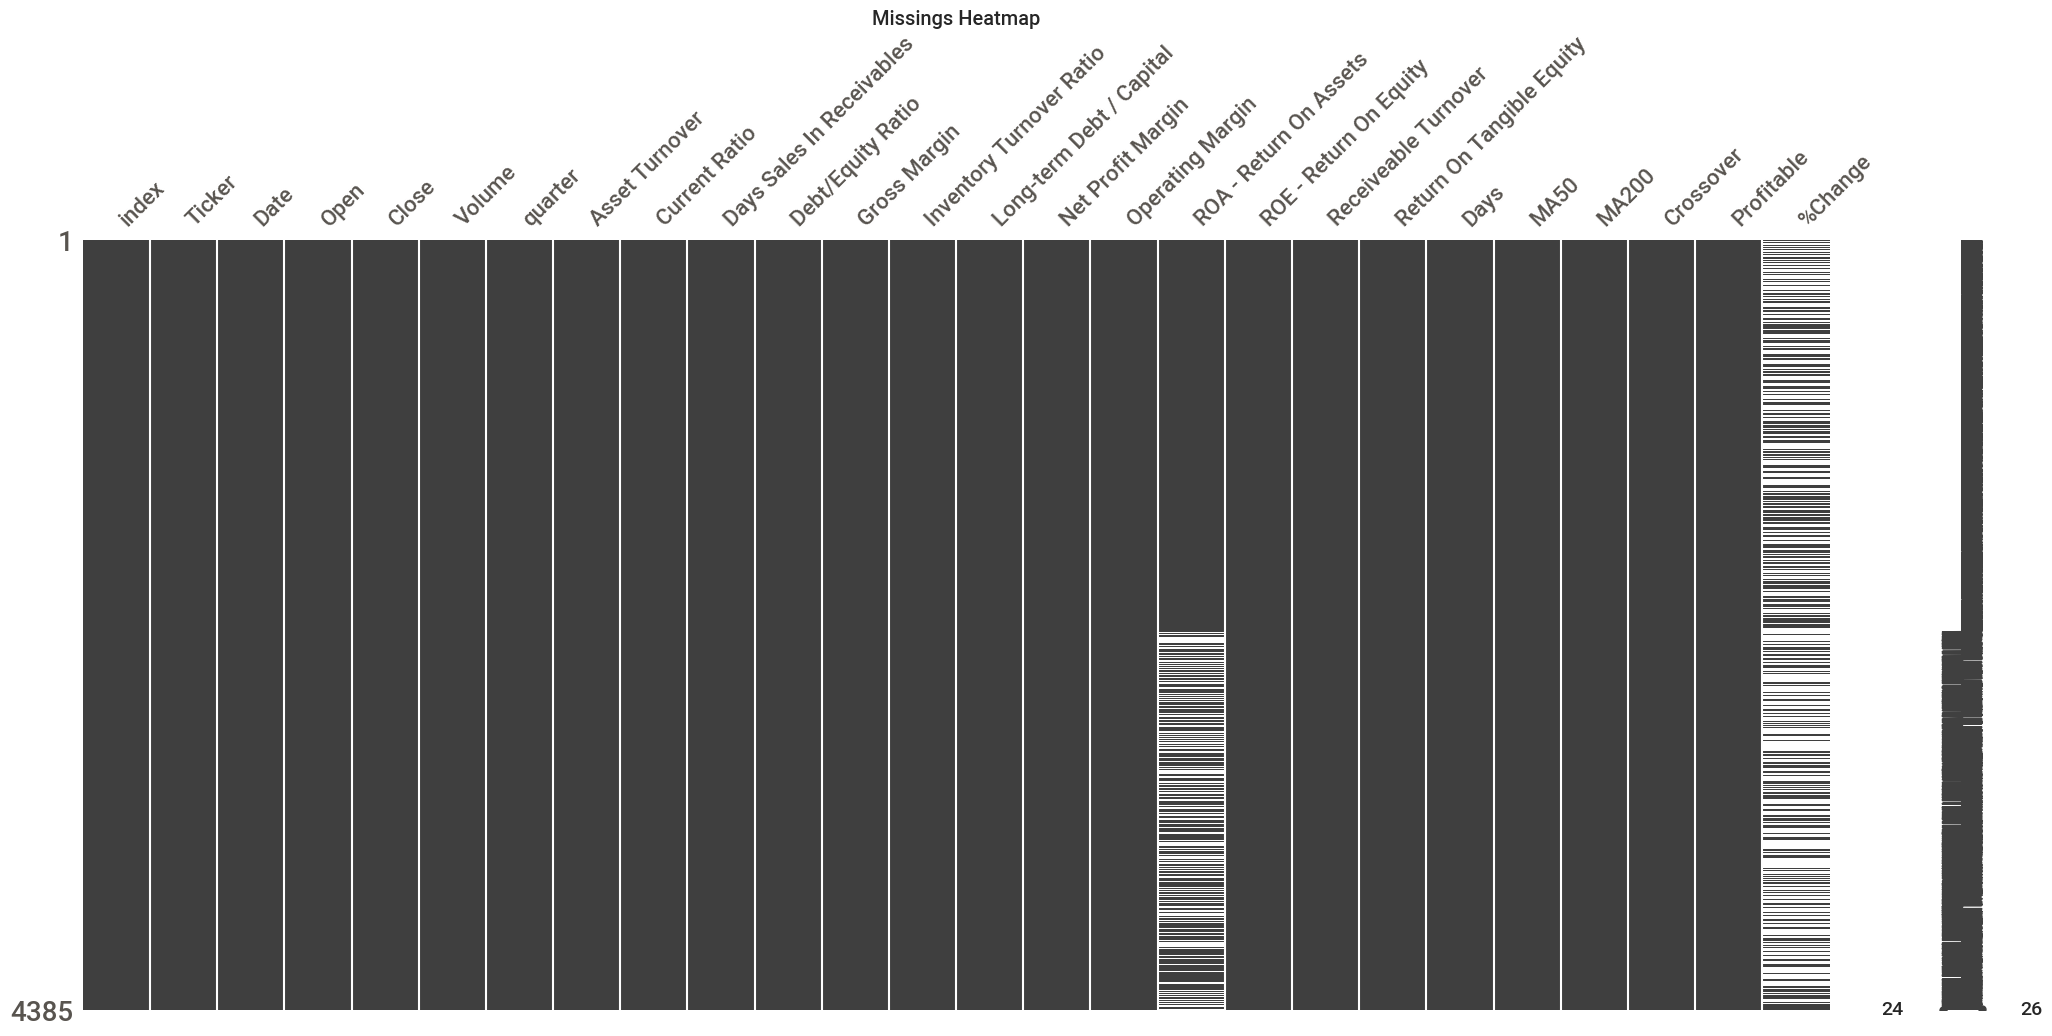

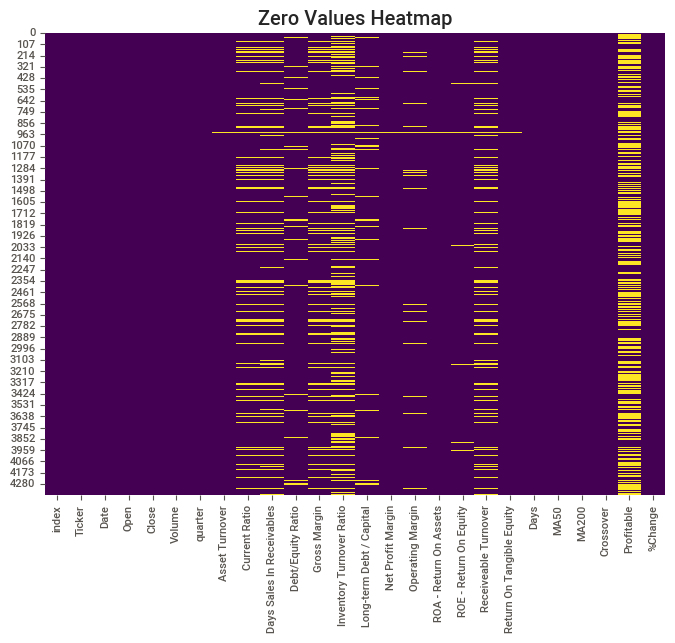

In [38]:
# Creating a matrix plot to visualize missing values
msno.matrix(ma50_cross_df)
plt.title('Missings Heatmap')
plt.show()


# Creating a heatmap to visualize zero values
plt.figure(figsize=(8, 6))
sns.heatmap(ma50_cross_df == 0, cmap='viridis', cbar=False)
plt.title('Zero Values Heatmap')
plt.show()

The feature ROA has 21% (900 out 0f 3,485. Seen in the 'sweet report') missing values.
<br>The missing values of '%Change' are expected and anyhow this feature is not part of the X DF for training the model.
<br>The zero values of 'Profitable' are OK and stand for non-profitable events.

#### Checking zero values

All zero values in all the features where checked to verify whether or not the zero values are legitimate or just replacing unavailable data.

Legitimate zero values were changed to 0.0001 to indicate an "almost zero" value but to differ it from a zero value.

Where needed and possible (it was possible in the majority of the cases) values were imputed according to data found in various financial web sites. Links to 3 of them are:

* https://csimarket.com/stocks
* https://www.alphaquery.com/stock
* https://www.macrotrends.net/stocks

<font color='red'>The process of replacing the zero values was done by using the Excel file of the ma50_cross_df DataFrame. Then it was saved as 'ma50_cross_no_zero_man_df.xlsx'
    
<font color='green'> ***Make sure you have this Excel file available for this code***

In [39]:
# Reading the revised (Excel) file into a DataFrame
cross_mod_df = pd.read_excel('ma50_cross_no_zero_man_df.xlsx')

In [40]:
cross_mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369 entries, 0 to 4368
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4369 non-null   int64         
 1   Ticker                     4369 non-null   object        
 2   Date                       4369 non-null   datetime64[ns]
 3   Open                       4369 non-null   float64       
 4   Close                      4369 non-null   float64       
 5   Volume                     4369 non-null   int64         
 6   quarter                    4369 non-null   int64         
 7   Asset Turnover             4364 non-null   float64       
 8   Current Ratio              4329 non-null   float64       
 9   Days Sales In Receivables  4273 non-null   float64       
 10  Debt/Equity Ratio          4364 non-null   float64       
 11  Gross Margin               4329 non-null   float64       
 12  Invent

In [41]:
"""
Removing ROA feature from the datset: Too many missing values and 
I have the ROE to represent the return performance.
"""

# Drop a specific column (e.g., column 'B')
cross_fin_df = cross_mod_df.drop('ROA - Return On Assets', axis=1)
cross_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369 entries, 0 to 4368
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4369 non-null   int64         
 1   Ticker                     4369 non-null   object        
 2   Date                       4369 non-null   datetime64[ns]
 3   Open                       4369 non-null   float64       
 4   Close                      4369 non-null   float64       
 5   Volume                     4369 non-null   int64         
 6   quarter                    4369 non-null   int64         
 7   Asset Turnover             4364 non-null   float64       
 8   Current Ratio              4329 non-null   float64       
 9   Days Sales In Receivables  4273 non-null   float64       
 10  Debt/Equity Ratio          4364 non-null   float64       
 11  Gross Margin               4329 non-null   float64       
 12  Invent

#### Revised dataset missing and zeros mappings

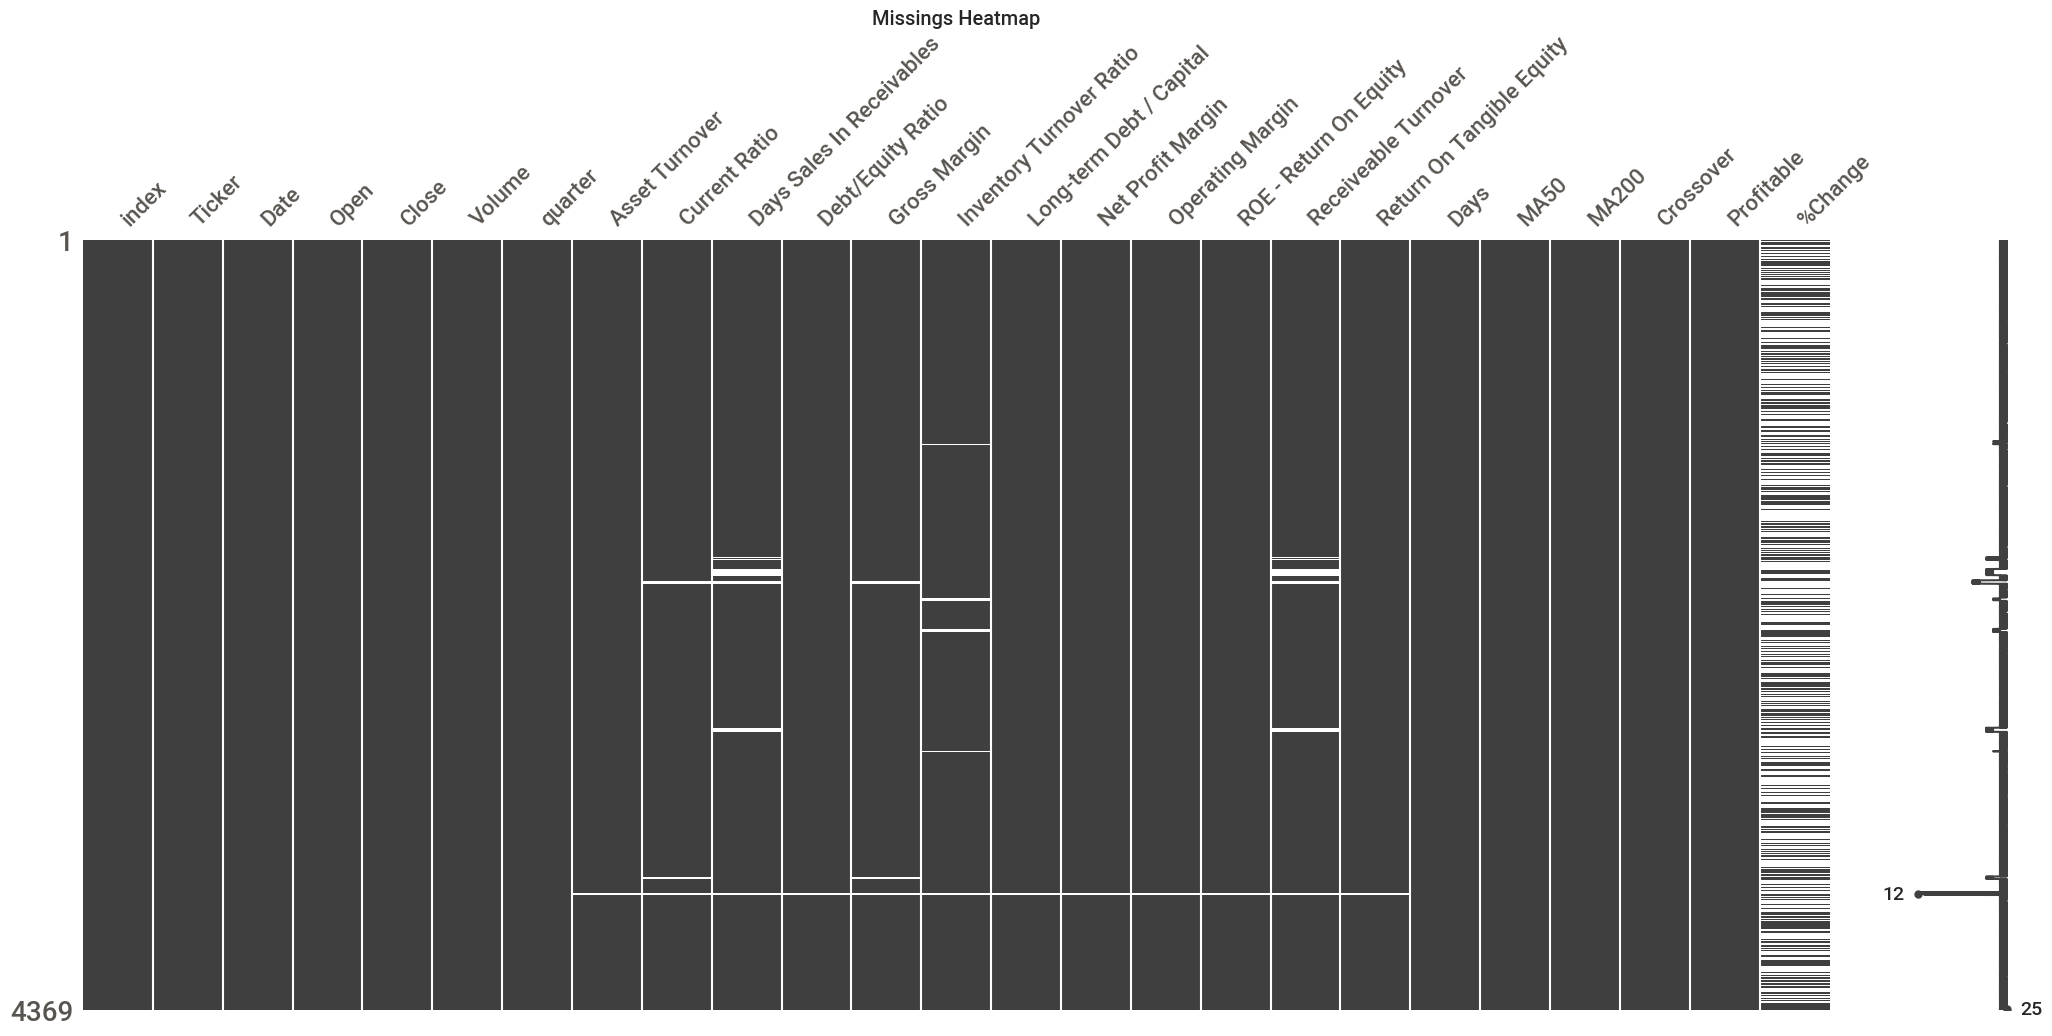

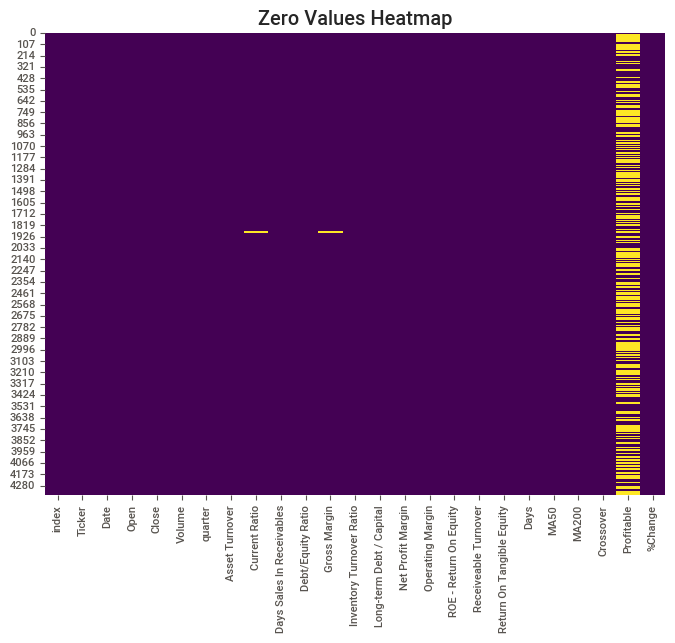

In [42]:
# Creating a matrix plot to visualize missing values
msno.matrix(cross_fin_df)
plt.title('Missings Heatmap')
plt.show()


# Creating a heatmap to visualize zero values
plt.figure(figsize=(8, 6))
sns.heatmap(cross_fin_df == 0, cmap='viridis', cbar=False)
plt.title('Zero Values Heatmap')
plt.show()

*<font color='red'>Note: If zero values are still shown here, it is as a result of the company having missing values in some other features and knowing that they will be removed from the dataset when the rows with missing values will be removed*

In [43]:
# Replacing the NaN values in the %Change column with 0 values (before removing rows with NaN)
cross_fin_df['%Change'].fillna(0, inplace=True)
#cross_fin_df.info()

In [44]:
# Dropping rows containing NaN values
cross_fin_df = cross_fin_df.dropna()

# Resetting the index
cross_fin_df = cross_fin_df.reset_index(drop=True)

cross_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4212 non-null   int64         
 1   Ticker                     4212 non-null   object        
 2   Date                       4212 non-null   datetime64[ns]
 3   Open                       4212 non-null   float64       
 4   Close                      4212 non-null   float64       
 5   Volume                     4212 non-null   int64         
 6   quarter                    4212 non-null   int64         
 7   Asset Turnover             4212 non-null   float64       
 8   Current Ratio              4212 non-null   float64       
 9   Days Sales In Receivables  4212 non-null   float64       
 10  Debt/Equity Ratio          4212 non-null   float64       
 11  Gross Margin               4212 non-null   float64       
 12  Invent

#### Revised dataset mapping of zeros and NaNs

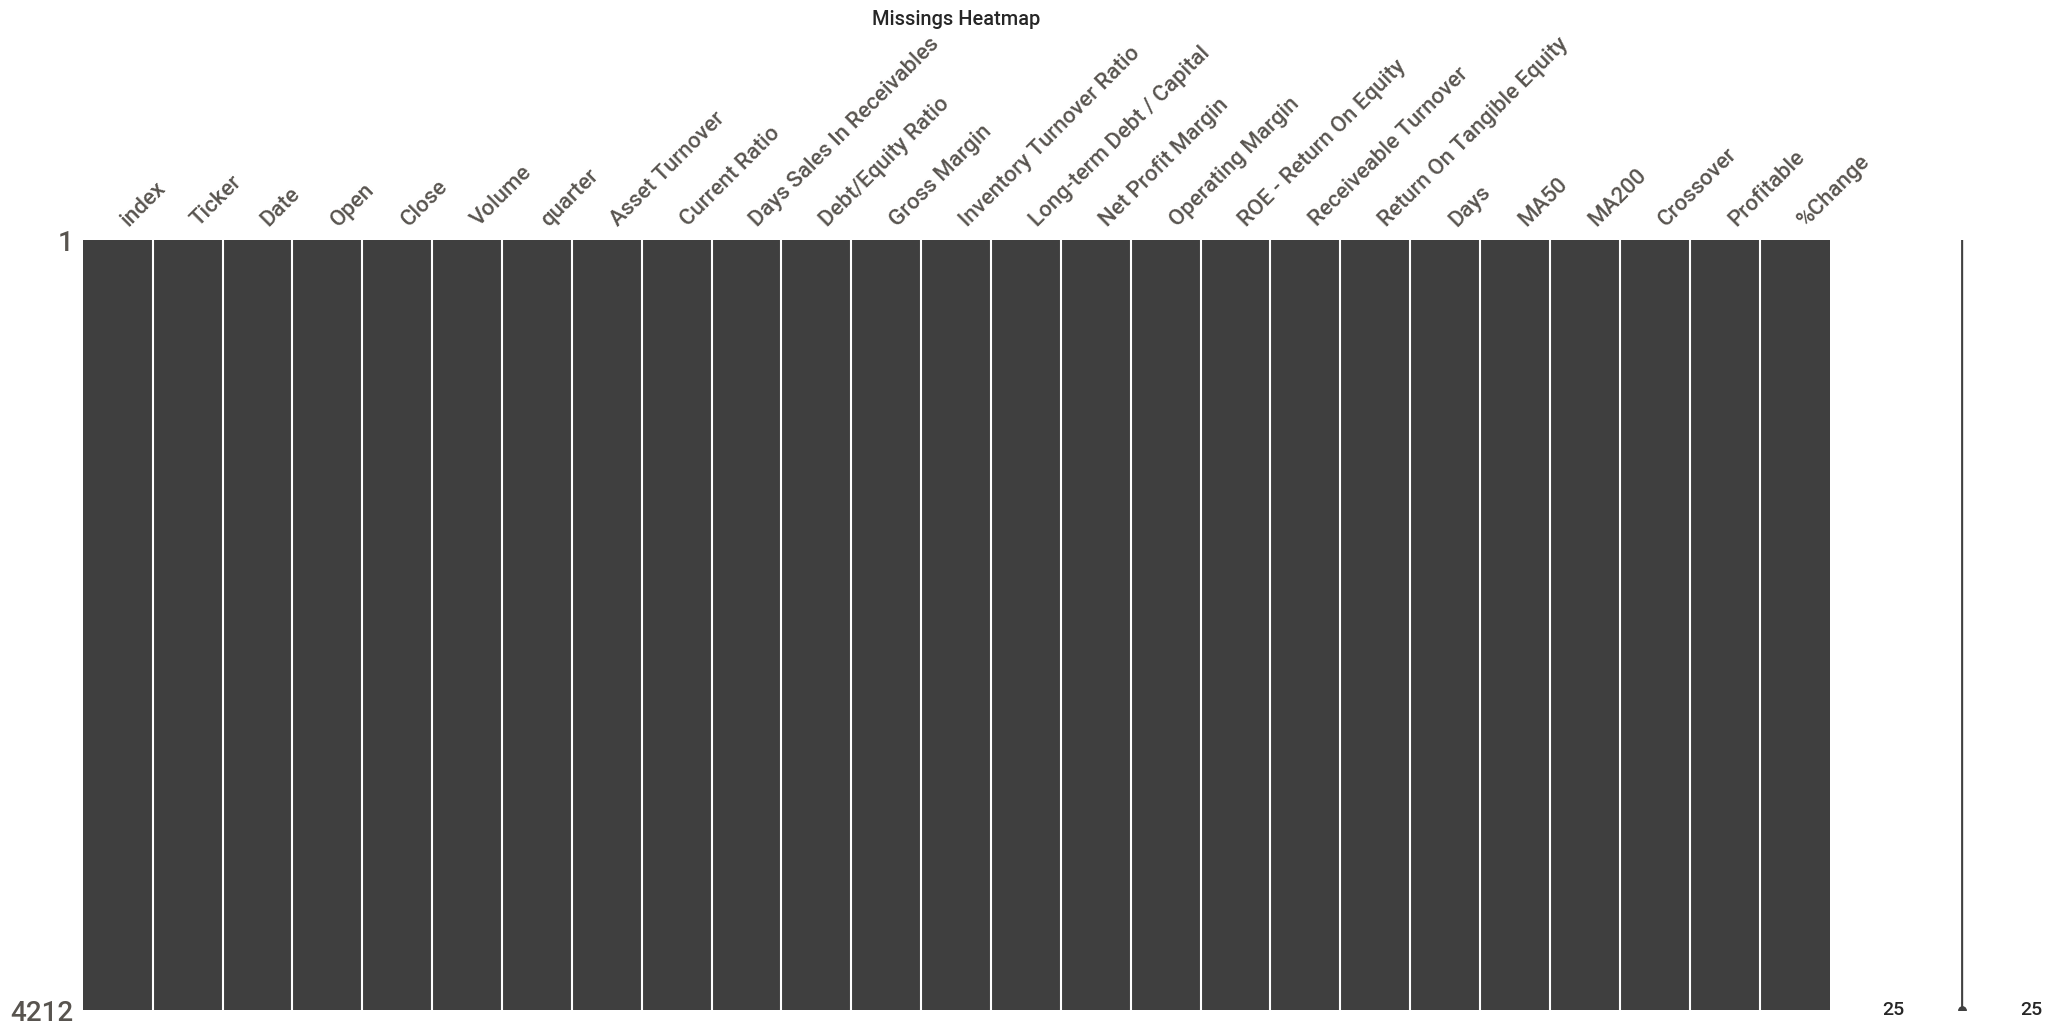

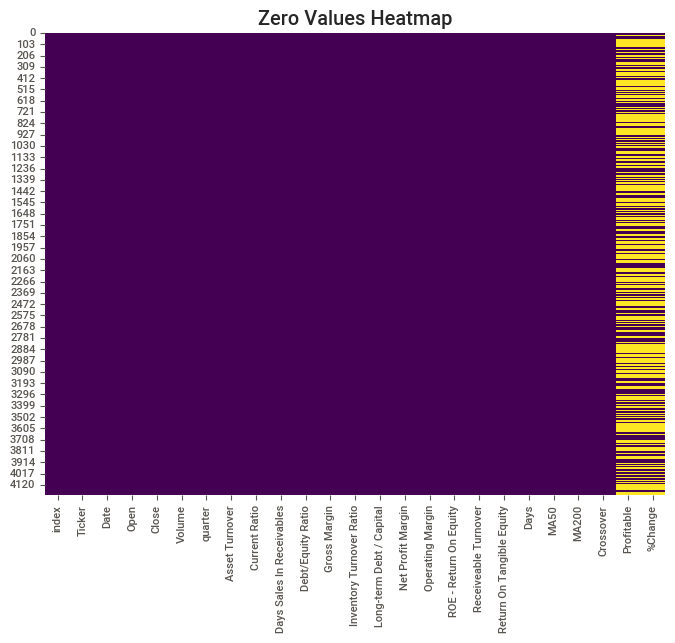

In [45]:
# Creating a matrix plot to visualize missing values
msno.matrix(cross_fin_df)
plt.title('Missings Heatmap')
plt.show()


# Creating a heatmap to visualize zero values
plt.figure(figsize=(8, 6))
sns.heatmap(cross_fin_df == 0, cmap='viridis', cbar=False)
plt.title('Zero Values Heatmap')
plt.show()

Good! All seems to be OK (for now...)


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_10"></a>
### Removing outliers

#### BoxPlot of the revised dataset after removing zeros and NaNs

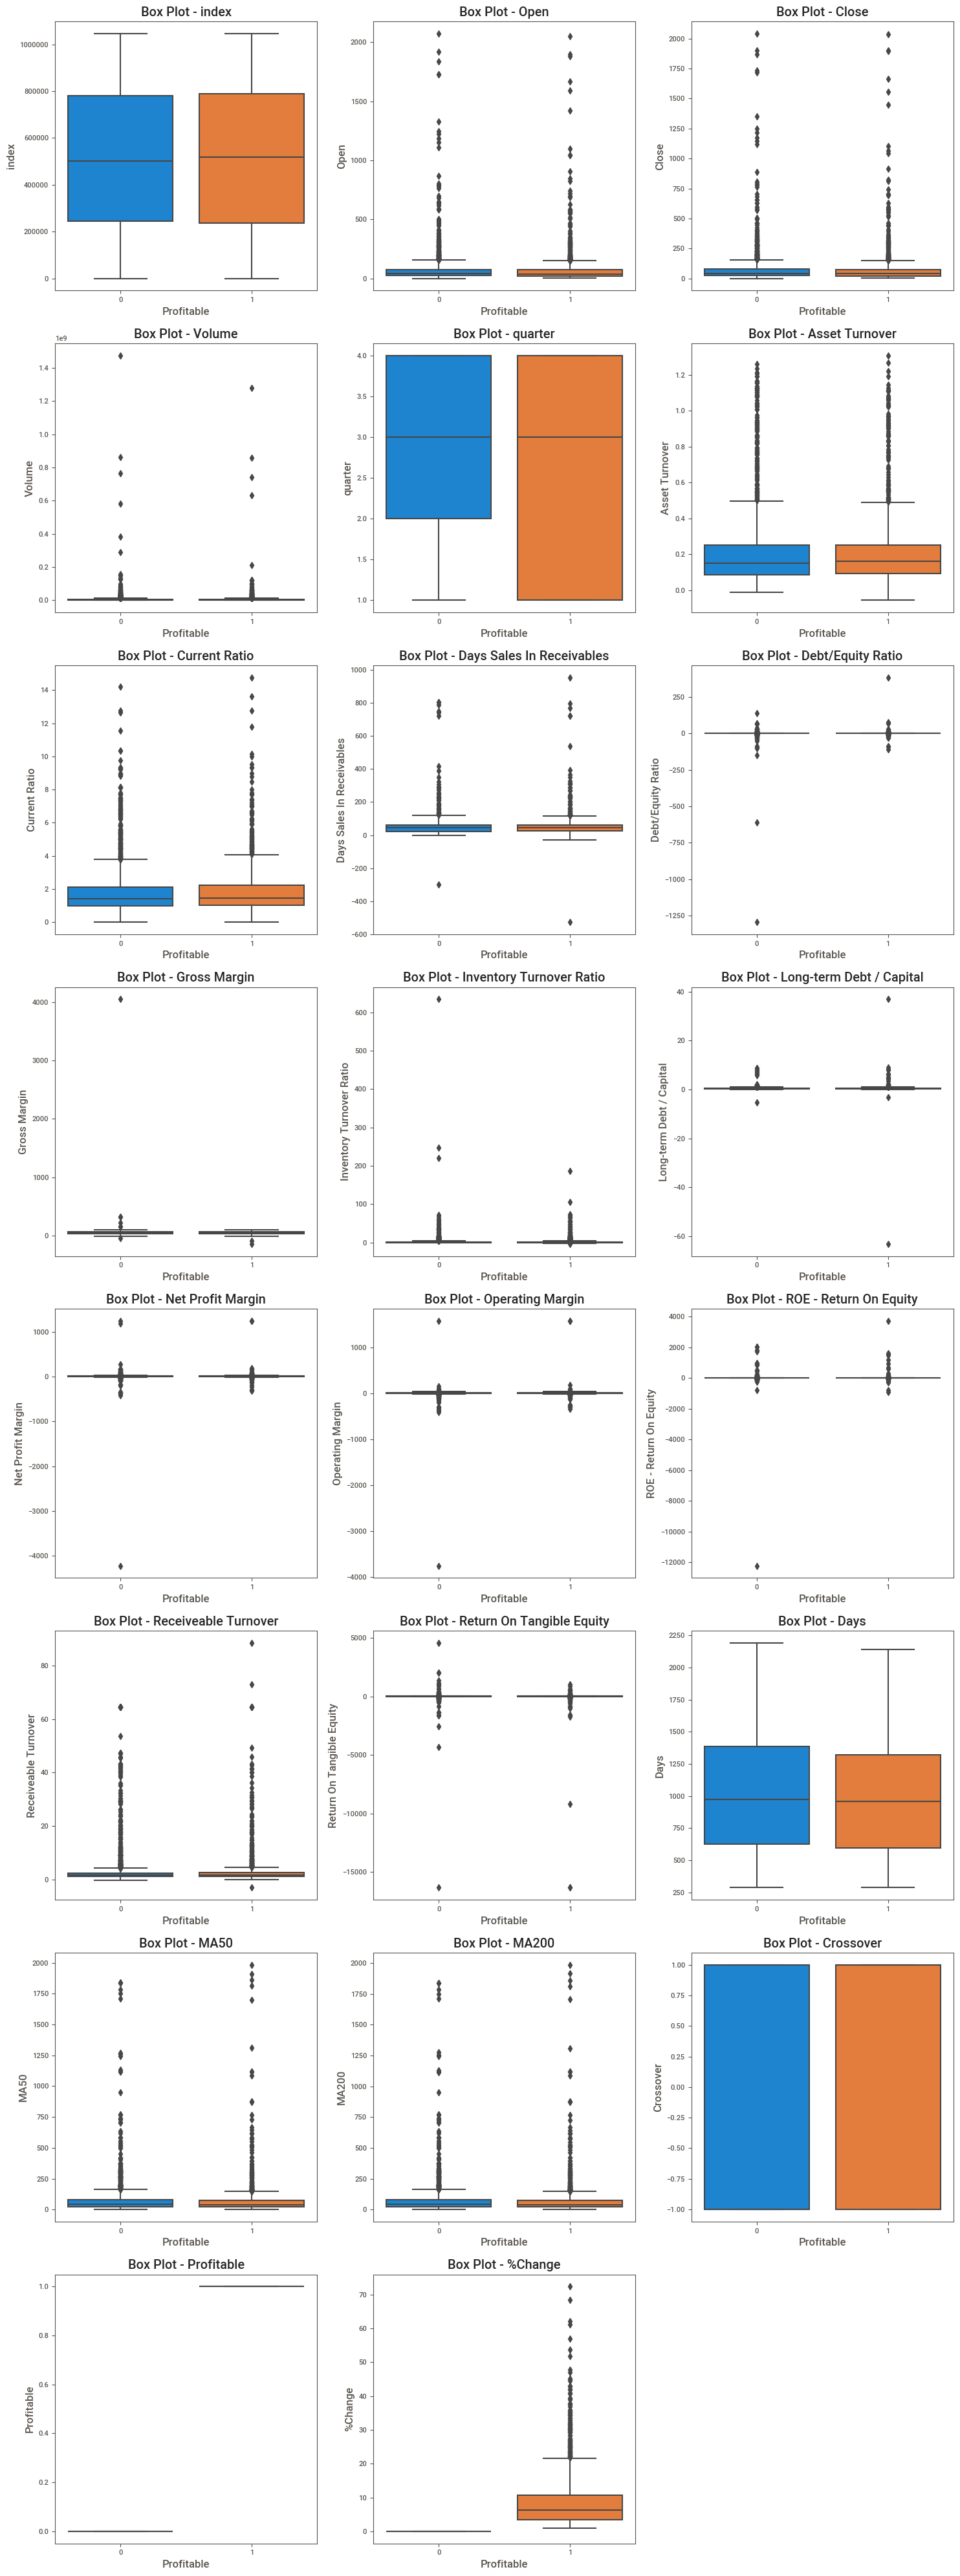

In [46]:
# Selecting only numeric columns for the box plots
numeric_columns = cross_fin_df.select_dtypes(include='number')

# Getting the number of numeric columns
num_cols = len(numeric_columns.columns)

# Setting up the subplots in a grid with multiple rows
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flattenning the axes to handle the cases when num_cols is not a multiple of 3
axes = axes.flatten()

# Plotting box plots for numeric columns in an array
for i, column in enumerate(numeric_columns.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Profitable', y=column, data=cross_fin_df, ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')
    axes[i].set_xlabel('Profitable')
    axes[i].set_ylabel(column)

# Removing empty subplots in case the number of features is not a multiple of 3
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [47]:
"""
Removing outliers by removing the rows which contain values outside a defined range 
(either smaller than a minimum or bigger than a maximum) in selected columns 
according to the boxplot graphs.
There are columns where we decided not to remove any rows because the extreme values seem to be "legitimate".
"""

# Defining the range for each column
range_conditions = {
    'Days Sales In Receivables': (-200.0, 800.0),
    'Debt/Equity Ratio': (-250.0, 200.0),
    'Gross Margin': (-200.0, 200.0),
    'Inventory Turnover Ratio': (0.0, 200.0),
    'Long-term Debt / Capital': (-20.0, 20.0),
    'Net Profit Margin': (-500.0, 500.0),
    'Operating Margin': (-400.0, 400.0),
    'ROE - Return On Equity': (-2000.0, 2000.0),
    'Return On Tangible Equity': (-2000.0, 2000.0)
}

# Initializing clean_cross_df as the original DataFrame
clean_cross_df = cross_fin_df.copy()

# Applying range conditions to each column
for column, (min_value, max_value) in range_conditions.items():
    clean_cross_df = clean_cross_df[(clean_cross_df[column] >= min_value) & (clean_cross_df[column] <= max_value)]

# Resetting the index outside the loop
clean_cross_df = clean_cross_df.reset_index(drop=True)

# Printing the first few rows of the cleaned DataFrame
clean_cross_df.head(1)


index Ticker       Date  Open  Close   Volume  quarter  Asset Turnover  \
0    318      A 2006-07-06  19.4   19.6  2054200        3          0.1603   

   Current Ratio  Days Sales In Receivables  ...  Operating Margin  \
0         2.5128                    61.9613  ...           14.6893   

   ROE - Return On Equity  Receiveable Turnover  Return On Tangible Equity  \
0                  5.6962                1.4525                     6.5237   

   Days    MA50     MA200  Crossover  Profitable  %Change  
0   461  21.499  21.51925         -1           0      0.0  

[1 rows x 25 columns]

In [48]:
clean_cross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4180 non-null   int64         
 1   Ticker                     4180 non-null   object        
 2   Date                       4180 non-null   datetime64[ns]
 3   Open                       4180 non-null   float64       
 4   Close                      4180 non-null   float64       
 5   Volume                     4180 non-null   int64         
 6   quarter                    4180 non-null   int64         
 7   Asset Turnover             4180 non-null   float64       
 8   Current Ratio              4180 non-null   float64       
 9   Days Sales In Receivables  4180 non-null   float64       
 10  Debt/Equity Ratio          4180 non-null   float64       
 11  Gross Margin               4180 non-null   float64       
 12  Invent

In [49]:
clean_cross_df.describe().T

count                           mean  \
index                      4180.0                  512026.741388   
Date                         4180  2013-12-30 09:39:47.368421120   
Open                       4180.0                       73.26556   
Close                      4180.0                      73.319177   
Volume                     4180.0                 7640142.440191   
quarter                    4180.0                       2.572727   
Asset Turnover             4180.0                       0.203958   
Current Ratio              4180.0                       1.811005   
Days Sales In Receivables  4180.0                      46.689996   
Debt/Equity Ratio          4180.0                       0.872635   
Gross Margin               4180.0                      48.626308   
Inventory Turnover Ratio   4180.0                        2.32652   
Long-term Debt / Capital   4180.0                       0.429178   
Net Profit Margin          4180.0                      11.075605   
Operating Margin           4180.0                       15.29304   
ROE - Return On Equity     4180.0                       7.903008   
Receiveable Turnover       4180.0                       3.083974   
Return On Tangible Equity  4180.0                       0.009143   
Days                       4180.0                    1047.213397   
MA50                       4180.0                      73.615535   
MA200                      4180.0                      73.626525   
Crossover                  4180.0                      -0.035885   
Profitable                 4180.0                       0.432775   
%Change                    4180.0                       3.715988   

                                           min                  25%  \
index                                    318.0             239542.5   
Date                       2006-01-23 00:00:00  2008-11-21 00:00:00   
Open                                      1.76                24.15   
Close                                     1.77                24.12   
Volume                                 33400.0            1184200.0   
quarter                                    1.0                  2.0   
Asset Turnover                         -0.0051               0.0882   
Current Ratio                           0.0001              1.00055   
Days Sales In Receivables               0.0001            22.300925   
Debt/Equity Ratio                     -148.818             0.321175   
Gross Margin                          -143.704            30.005625   
Inventory Turnover Ratio                0.0001               0.0001   
Long-term Debt / Capital               -5.2156             0.232625   
Net Profit Margin                     -375.997              5.09805   
Operating Margin                       -327.16             8.660475   
ROE - Return On Equity                -927.934              2.10985   
Receiveable Turnover                    0.0001             1.229275   
Return On Tangible Equity              -1712.5            -3.217275   
Days                                     288.0                616.0   
MA50                                    1.9718              24.6542   
MA200                                   1.9796            24.634737   
Crossover                                 -1.0                 -1.0   
Profitable                                 0.0                  0.0   
%Change                                    0.0                  0.0   

                                           50%                  75%  \
index                                 507831.5            782629.75   
Date                       2013-10-26 12:00:00  2018-04-20 18:00:00   
Open                                     41.77              76.8925   
Close                                   41.925              76.5825   
Volume                               2508150.0            5465750.0   
quarter                                    3.0                  4.0   
Asset Turnover                          0.1542        

#### BoxPlot of the datset after removing outliers

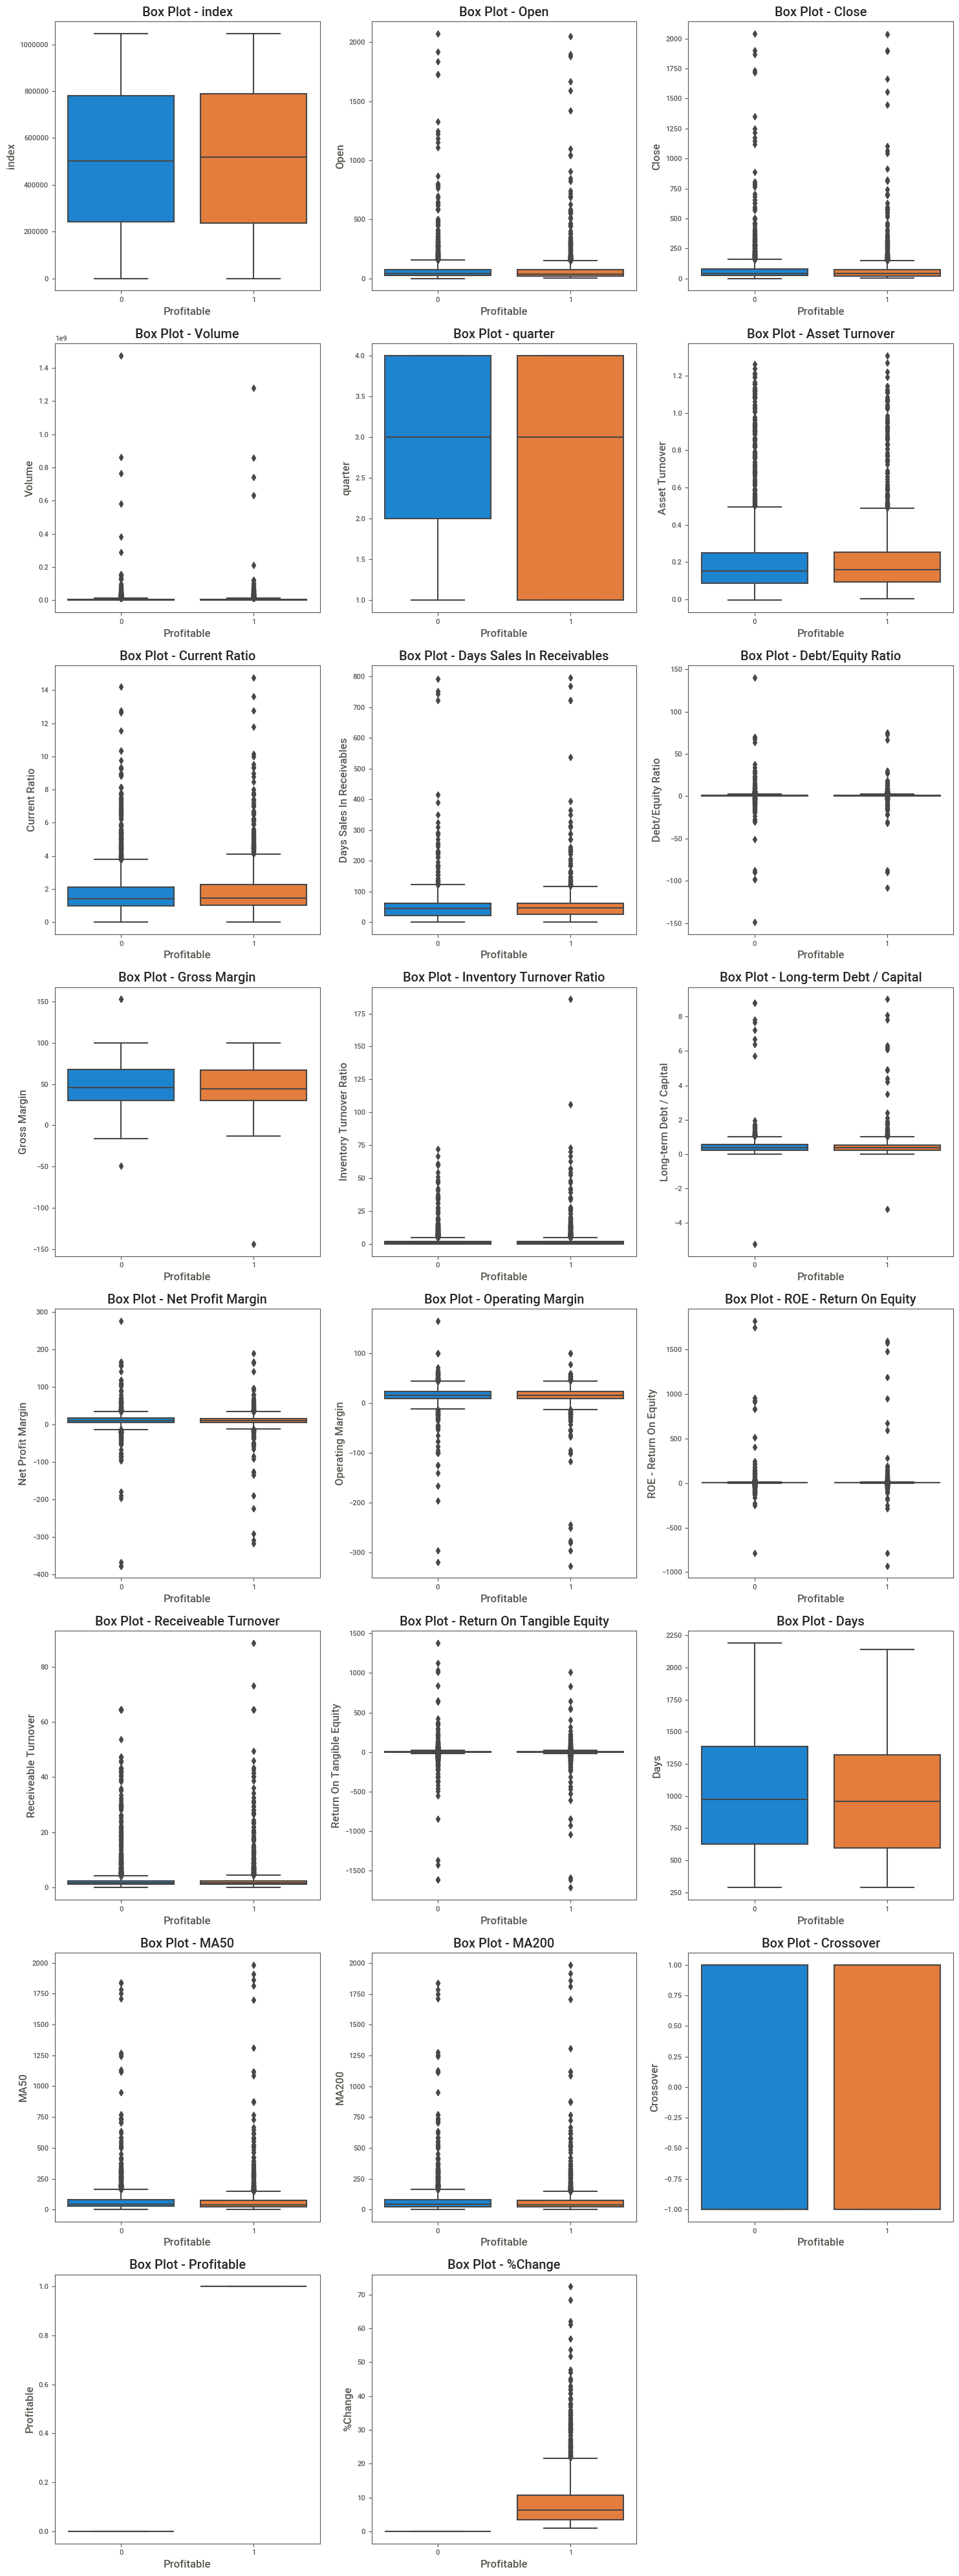

In [50]:
# Selecting only numeric columns for the box plots
numeric_columns = clean_cross_df.select_dtypes(include='number')

# Getting the number of numeric columns
num_cols = len(numeric_columns.columns)

# Setting up the subplots in a grid with multiple rows
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# Flattenning the axes to handle the cases when num_cols is not a multiple of 3
axes = axes.flatten()

# Plotting box plots for numeric columns in an array
for i, column in enumerate(numeric_columns.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x='Profitable', y=column, data=clean_cross_df, ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')
    axes[i].set_xlabel('Profitable')
    axes[i].set_ylabel(column)

# Removing empty subplots in case the number of features is not a multiple of 3
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### Getting a general view on the data in the new dataset

In [51]:
sweet_report = sv.analyze(clean_cross_df)
sweet_report.show_html('ma50_clean_cross_df_sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report ma50_clean_cross_df_sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [52]:
clean_cross_df.to_pickle("clean_cross_df.pkl")


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_11"></a>
### Researching the Target and relationships between features

In [53]:
clean_cross_df = pd.read_pickle("clean_cross_df.pkl")
clean_cross_df.shape

(4180, 25)

#### Counting the number of rows with values showing a crossover either bullish (1) or bearish (-1)

In [54]:
# Counting occurrences of each value in 'Crossover'
crossover_counts = clean_cross_df['Crossover'].value_counts()

# Displaying the result
print(crossover_counts)


Crossover
-1    2165
 1    2015
Name: count, dtype: int64


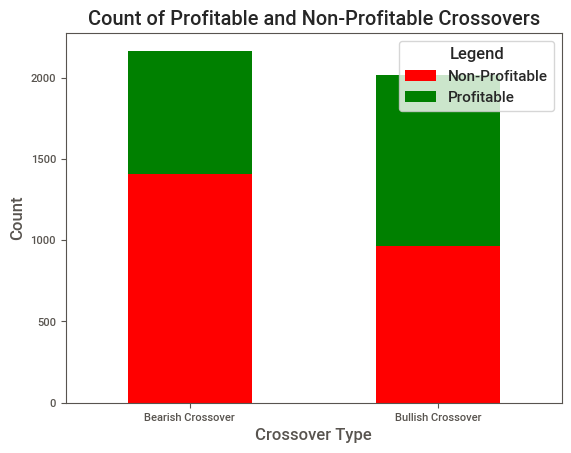

In [55]:
# Counting the occurrences of 'Profitable' for each 'Crossover' type
profitable_counts = clean_cross_df.groupby(['Crossover', 'Profitable']).size().unstack(fill_value=0)

# Creating a bar plot
ax = profitable_counts.plot(kind='bar', stacked=True, color=['red', 'green'])

# Adding title and labels
plt.title('Count of Profitable and Non-Profitable Crossovers')
plt.xlabel('Crossover Type')
plt.ylabel('Count')

# Customizing legend labels
legend_labels = ['Non-Profitable', 'Profitable']
ax.legend(legend_labels, title='Legend')

# Adding custom x-axis labels
x_labels = ['Bullish Crossover' if label.get_text() == '1' else 'Bearish Crossover' for label in ax.get_xticklabels()]

# Setting the custom x-axis labels
ax.set_xticklabels(x_labels, rotation=0)

# Displaying the plot
plt.show()

#### Counting the number of rows with values showing a Profitable (1) or Non-Profitable (0) crossover.

In [56]:
# Counting occurrences of each value in 'Profitable'
profitable_counts = clean_cross_df['Profitable'].value_counts()

# Displaying the result
print(profitable_counts)


Profitable
0    2371
1    1809
Name: count, dtype: int64


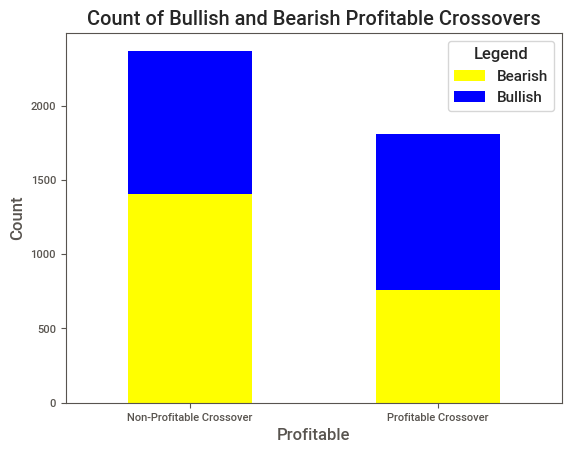

In [57]:
# Counting the types of 'Crossover' for each 'Profitable' value
crossover_counts = clean_cross_df.groupby(['Profitable', 'Crossover']).size().unstack(fill_value=0)

# Creating a bar plot
ax = crossover_counts.plot(kind='bar', stacked=True, color=['yellow', 'blue'])

# Adding title and labels
plt.title('Count of Bullish and Bearish Profitable Crossovers')
plt.xlabel('Profitable')
plt.ylabel('Count')

# Customizing legend labels
legend_labels = ['Bearish', 'Bullish']
ax.legend(legend_labels, title='Legend')

# Adding custom x-axis labels
x_labels = ['Profitable Crossover' if label.get_text() == '1' else 'Non-Profitable Crossover' for label in ax.get_xticklabels()]

# Set the custom x-axis labels
ax.set_xticklabels(x_labels, rotation=0)

# Displaying the plot
plt.show()


In [58]:
# Creating a 2x2 matrix of counts
matrix_counts = pd.crosstab(clean_cross_df['Crossover'], clean_cross_df['Profitable'])

print(matrix_counts)

Profitable     0     1
Crossover             
-1          1409   756
 1           962  1053


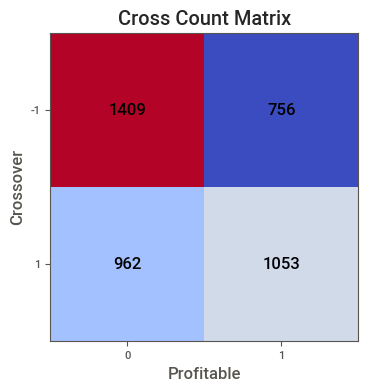

In [59]:
# Creating a heatmap without the color bar
plt.figure(figsize=(6, 4))
plt.imshow(matrix_counts, cmap='coolwarm')
plt.colorbar().remove()  # Remove the color bar

# Adding annotations
for i in range(matrix_counts.shape[0]):
    for j in range(matrix_counts.shape[1]):
        plt.text(j, i, matrix_counts.iloc[i, j], ha='center', va='center', color='black')

# Customizing the plot
plt.title('Cross Count Matrix')
plt.xlabel('Profitable')
plt.ylabel('Crossover')

# Adjusting tick labels
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.yticks(ticks=[0, 1], labels=['-1', '1'])

# Showing the plot
plt.show()


In [60]:
# Percentage of Profitable (1) values out of the total instances
(756 + 1053) / (756 + 1053 + 1409 + 962)

0.43277511961722487

#### <font color=blue>About 43% of all the instances (rows) are Profitable (1), which is a good balance for the Target

In [61]:
# Percentage of Profitable (1) out of the Bullish (1) Crossover instances
756 / (756 + 1409)

0.3491916859122402

#### <font color=blue>About 35% of all the Bearish crossovers are Profitable

In [62]:
# Percentage of Profitable (1) out of the Bearish (-1) Crossover instances
1053 / (1053 + 962)

0.5225806451612903

#### <font color=blue>About 52% of all the Bullish crossovers are Profitable

#### Exploring relationships between variables.

<a id="there_you_go_31"></a>
#### A plot which shows the percentage of Profitable = 1 for each stock

<font color='red'>***Note: This plot delays the "flow" of running the code. For the purpose of avoiding this issue the cell with the relevant code was moved to the end of the notebook, so it will be executed last.<br> You can view the cell by using the below link and then come back to this point.***
    
**[View the plot](#there_you_go_30)**

#### Scatter plots of various pairs of features marked by 'Profitable'

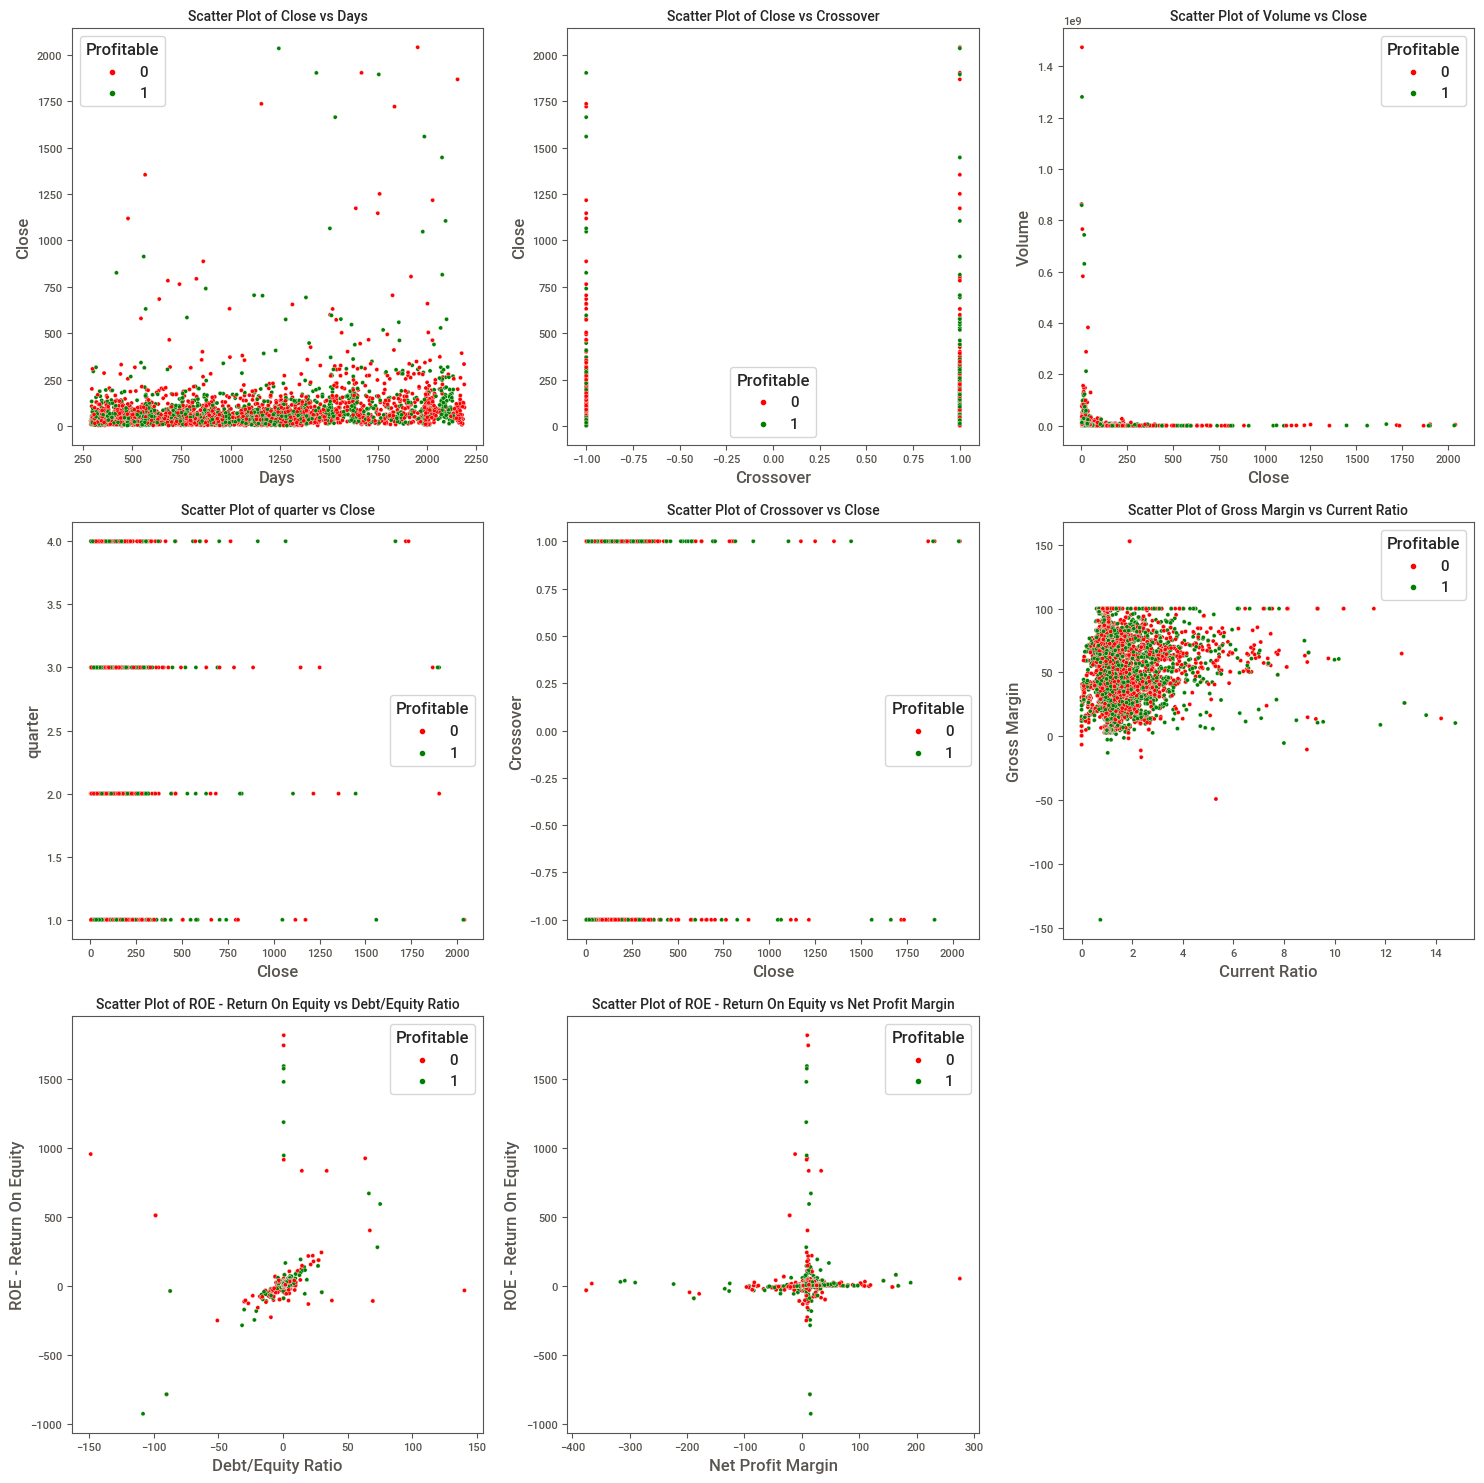

In [63]:
# Setting feature-pairs for scatter plots
feature_pairs = [
                ('Days', 'Close', 'Profitable'),
                ('Crossover', 'Close', 'Profitable'),
                ('Close', 'Volume', 'Profitable'), 
                ('Close', 'quarter', 'Profitable'),
                ('Close', 'Crossover', 'Profitable'),
                ('Current Ratio', 'Gross Margin', 'Profitable'), 
                ('Debt/Equity Ratio', 'ROE - Return On Equity', 'Profitable'), 
                ('Net Profit Margin', 'ROE - Return On Equity', 'Profitable')                
                ]

# Setting up the subplots
ncols = 3
nrows = (len(feature_pairs) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Creating scatter plots for each pair of features
for i, (x_feature, y_feature, hue_feature) in enumerate(feature_pairs):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    sns.scatterplot(x=x_feature, y=y_feature, hue=hue_feature, data=clean_cross_df, ax=ax, palette={0: 'red', 1: 'green'})
    ax.set_title(f'Scatter Plot of {y_feature} vs {x_feature}', fontsize=10)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(title='Profitable')

# Flattenning the 2D array of subplots into a 1D array for easier handling the display
axes = axes.flatten()

# Removing empty subplots in case the number of features is not a multiple of 3
for i in range(len(feature_pairs), len(axes)):
    fig.delaxes(axes[i])

# Adjusting the layout
plt.tight_layout()
plt.show()


The above plots show that there is no clear seperation between profitable and non-profitable events in any of the plotted pairs and that no significant relationship exists in any of these pairs of features.

**Correlation values and Correlation Heatmap**

**Encoding the 'Ticker' feature**

The 'Ticker' feature (name of the stock) is of 'object' type. In order to keep it in the training dataset for all models it needs to be encoded (changed to numeric type).

Giving the mean of the Target ('Profitable') column for each 'Ticker' as the encoding method has also the meaning of stating what is the percentage of profitable crossover events each stock has (as the values are either 1 for profitable events or 0 for non-profitable events).

In [64]:
# Calculating the mean target value for each ticker to be used as the code for each ticker
ticker_means = clean_cross_df.groupby('Ticker')['Profitable'].mean()

# Adding a new column with the encoded values
clean_cross_df['Ticker_encoded'] = clean_cross_df['Ticker'].map(ticker_means)

clean_cross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      4180 non-null   int64         
 1   Ticker                     4180 non-null   object        
 2   Date                       4180 non-null   datetime64[ns]
 3   Open                       4180 non-null   float64       
 4   Close                      4180 non-null   float64       
 5   Volume                     4180 non-null   int64         
 6   quarter                    4180 non-null   int64         
 7   Asset Turnover             4180 non-null   float64       
 8   Current Ratio              4180 non-null   float64       
 9   Days Sales In Receivables  4180 non-null   float64       
 10  Debt/Equity Ratio          4180 non-null   float64       
 11  Gross Margin               4180 non-null   float64       
 12  Invent

In [65]:
clean_cross_df.to_csv('clean_cross_df.csv')

In [66]:
# Creating the correlation matrix
clean_correlation_matrix = (clean_cross_df.select_dtypes(include=['number'])).corr()
clean_correlation_matrix

index      Open     Close    Volume   quarter  \
index                      1.000000 -0.042165 -0.041714 -0.054352 -0.000042   
Open                      -0.042165  1.000000  0.999855 -0.055469 -0.035441   
Close                     -0.041714  0.999855  1.000000 -0.055572 -0.035363   
Volume                    -0.054352 -0.055469 -0.055572  1.000000 -0.010316   
quarter                   -0.000042 -0.035441 -0.035363 -0.010316  1.000000   
Asset Turnover             0.016137  0.012176  0.011972 -0.013214  0.047368   
Current Ratio              0.079322  0.045142  0.045802  0.012069 -0.009398   
Days Sales In Receivables  0.043291 -0.038976 -0.038808 -0.000613 -0.003847   
Debt/Equity Ratio          0.007778  0.004169  0.004152 -0.006810  0.009347   
Gross Margin              -0.071483  0.107427  0.107605 -0.011513  0.002221   
Inventory Turnover Ratio   0.091447  0.019570  0.019722  0.070230  0.003140   
Long-term Debt / Capital   0.029127  0.052564  0.052436 -0.036202 -0.000406   
Net Profit Margin          0.011677  0.068823  0.069506  0.011166 -0.009871   
Operating Margin           0.021755  0.086125  0.086353  0.012804 -0.007588   
ROE - Return On Equity     0.011459  0.006157  0.006070  0.000193 -0.006494   
Receiveable Turnover       0.078963 -0.014960 -0.015012  0.005381  0.015069   
Return On Tangible Equity -0.029322 -0.015473 -0.016241 -0.000245  0.025361   
Days                       0.010879  0.227709  0.227754 -0.012429 -0.074771   
MA50                      -0.041621  0.994925  0.994802 -0.055327 -0.037424   
MA200                     -0.041642  0.994759  0.994631 -0.055309 -0.037355   
Crossover                  0.000038  0.029250  0.030275 -0.013764 -0.048774   
Profitable                 0.006275 -0.008258 -0.007992  0.004921 -0.011571   
%Change                    0.018540 -0.033416 -0.033469  0.010582  0.037572   
Ticker_encoded             0.027130 -0.040542 -0.040114  0.041509 -0.012173   

                           Asset Turnover  Current Ratio  \
index                            0.016137       0.079322   
Open                             0.012176       0.045142   
Close                            0.011972       0.045802   
Volume                          -0.013214       0.012069   
quarter                          0.047368      -0.009398   
Asset Turnover                   1.000000      -0.037053   
Current Ratio                   -0.037053       1.000000   
Days Sales In Receivables       -0.079779       0.084513   
Debt/Equity Ratio               -0.024792      -0.024862   
Gross Margin                    -0.484791       0.129154   
Inventory Turnover Ratio         0.102912      -0.041597   
Long-term Debt / Capital         0.126572      -0.121892   
Net Profit Margin               -0.124037       0.038646   
Operating Margin                -0.151625       0.032369   
ROE - Return On Equity           0.014734      -0.009116   
Receiveable Turnover             0.191481       0.087493   
Return On Tangible Equity        0.003927       0.002777   
Days                            -0.063602      -0.036881   
MA50                             0.010436       0.044149   
MA200                            0.010451       0.044136   
Crossover                       -0.014514       0.001554   
Profitable                       0.001112       0.015853   
%Change                          0.009220       0.051765   
Ticker_encoded                  -0.010383       0.090209   

                           Days Sales In Receivables  Debt/Equity Ratio  \
index                                       0.043291           0.007778   
Open                                       -0.038976           0.004169   
Close                                      -0.038808           0.004152   
Volume                                     -0.000613          -0.006810   
quarter                                    -0.003847           0.009347   
Asset Turnover                             -0.079779          -0.024792   
Current Ratio               

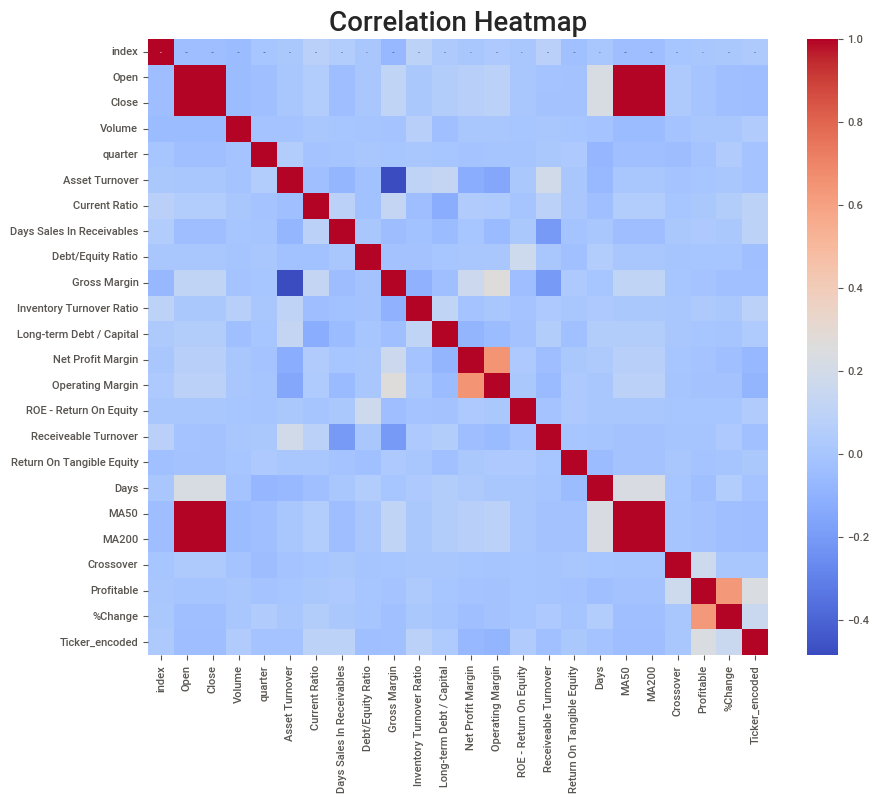

In [67]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
annot_font_scale = 1.0
sns.heatmap(clean_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": annot_font_scale})
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


There are only few features with **relatively** high correlation but part of them will not be in the X DF as they are redundent (represented by a very similar feature) or irrelevant for the training:

***MA50 and MA200*** - both should be with almost equal values as this is the definition of a "crossover event" - when one crosses the other, which means they have the same value at the crossover. **The MA200 will be removed***.

***%Change and Profitable*** - as explained already, **the %Change will not be part of X**.

***Open and Close*** - both refer to the stock's price at the open and at the close of the trading day. **The Open will be removed**.


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_12"></a>
### Creating the Train DF - X and the Target - y

Before creating X and y we'll remove a few features:

* Removing the following features (columns) which will not be used in creating X:
    * 'Ticker' which is replaced by 'Ticker_encoded'.
    * 'index' and '%Change' which are irrelevant for training the model.

    * 'MA200' which is redundant as its values are same (or almost same) as the values of 'MA50' (in the crossover of MA50 and MA200 both are equal).

    * 'Date' and 'Days' which are not relevant by any way to the crossover events.

    * 'Open' which is highly correlated to 'Close' and can be represented by it.

    * 'Profitable' which is the Target (y).

##### Removing the features

In [68]:
# Removing the features
columns_to_drop = ['Ticker', 'Date', 'Open', 'MA200', 'index', 'Days', '%Change', 'Profitable']
clean_cross_df0 = clean_cross_df.drop(columns_to_drop, axis=1)

## Applying Feature Scaling ( StandardScaler )
#sc = StandardScaler()
#clean_cross_stand_array = sc.fit_transform(clean_cross_df0)
## The output is a NumPy array, which is also OK for being used for the models but we prefer it as a DF
#clean_cross_stand_df = pd.DataFrame(clean_cross_stand_array, columns=clean_cross_df0.columns)

In [69]:
clean_cross_df0.head(1)

Close   Volume  quarter  Asset Turnover  Current Ratio  \
0   19.6  2054200        3          0.1603         2.5128   

   Days Sales In Receivables  Debt/Equity Ratio  Gross Margin  \
0                    61.9613             0.3956       55.3672   

   Inventory Turnover Ratio  Long-term Debt / Capital  Net Profit Margin  \
0                    0.7844                    0.2834            18.3212   

   Operating Margin  ROE - Return On Equity  Receiveable Turnover  \
0           14.6893                  5.6962                1.4525   

   Return On Tangible Equity    MA50  Crossover  Ticker_encoded  
0                     6.5237  21.499         -1            0.55

In [70]:
clean_cross_df0.shape

(4180, 18)

In [71]:
# Creating X
X = clean_cross_df0
X.shape

(4180, 18)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Close                      4180 non-null   float64
 1   Volume                     4180 non-null   int64  
 2   quarter                    4180 non-null   int64  
 3   Asset Turnover             4180 non-null   float64
 4   Current Ratio              4180 non-null   float64
 5   Days Sales In Receivables  4180 non-null   float64
 6   Debt/Equity Ratio          4180 non-null   float64
 7   Gross Margin               4180 non-null   float64
 8   Inventory Turnover Ratio   4180 non-null   float64
 9   Long-term Debt / Capital   4180 non-null   float64
 10  Net Profit Margin          4180 non-null   float64
 11  Operating Margin           4180 non-null   float64
 12  ROE - Return On Equity     4180 non-null   float64
 13  Receiveable Turnover       4180 non-null   float

In [73]:
# Creating y
y = clean_cross_df.Profitable
print(y.head())
y.info()

0    0
1    1
2    1
3    1
4    1
Name: Profitable, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 4180 entries, 0 to 4179
Series name: Profitable
Non-Null Count  Dtype
--------------  -----
4180 non-null   int64
dtypes: int64(1)
memory usage: 32.8 KB


In [74]:
X.to_pickle("X2.pkl")
y.to_pickle("y.pkl")

##### Train/Test split

In [75]:
# Taking 75% of the data for training the models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)

In [76]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(4180, 18) (3135, 18) (1045, 18) (4180,) (3135,) (1045,)


In [77]:
X_train.head()

Close    Volume  quarter  Asset Turnover  Current Ratio  \
2372  236.05   1115600        3          0.3285         1.3159   
2333   36.26   4371000        2          0.3694         4.1285   
3408   32.29   8588300        4          0.1226         1.1256   
3946   60.25   7031000        4          0.2513         1.8348   
3030   29.58  23701700        4          0.1470         2.4492   

      Days Sales In Receivables  Debt/Equity Ratio  Gross Margin  \
2372                    46.0028             0.8837       70.9536   
2333                    52.5746             0.1455       44.5063   
3408                    39.7255             1.1088       60.9149   
3946                    48.7560             0.4188       46.8579   
3030                    28.8876             0.3711       64.3020   

      Inventory Turnover Ratio  Long-term Debt / Capital  Net Profit Margin  \
2372                    9.4704                    0.4429             4.8968   
2333                    0.5975                    0.1270            15.8317   
3408                    1.3168                    0.3642            15.4891   
3946                    1.1564                    0.2549            13.7125   
3030                    1.0304                    0.2470            24.2256   

      Operating Margin  ROE - Return On Equity  Receiveable Turnover  \
2372            6.2808                  4.3551                1.9564   
2333           20.9410                  8.5843                1.7119   
3408           19.0670                  5.1077                2.2655   
3946           20.4641                  7.7126                1.8459   
3030           28.8253                  5.9147                3.1155   

      Return On Tangible Equity      MA50  Crossover  Ticker_encoded  
2372                     6.7864  234.2340         -1        0.400000  
2333                     8.5843   32.9514         -1        0.428571  
3408                    29.3018   31.5944          1        0.642857  
3946                    14.2520   59.3506         -1        0.470588  
3030                     7.8852   27.1504          1        0.590909

In [78]:
# Saving X_train for later using it in another app (predicting for a new crossing event).
X_train.to_csv('X_train2.csv')

In [79]:
X_test.head()

Close   Volume  quarter  Asset Turnover  Current Ratio  \
2281    9.61   998600        3          0.0311         2.5000   
1858  179.71   778600        4          1.0654         1.4557   
4047   61.34   923500        3          0.1777         1.7603   
155    25.13  4103800        4          0.4382         1.6914   
2132   20.37  1464200        4          0.1102         1.0664   

      Days Sales In Receivables  Debt/Equity Ratio  Gross Margin  \
2281                     0.0001             1.5675       60.0000   
1858                    17.5331            -1.1530       31.5030   
4047                    68.3812            -7.7917       49.7389   
155                     49.0251             0.5406        8.2726   
2132                    29.2815             1.2267       53.4349   

      Inventory Turnover Ratio  Long-term Debt / Capital  Net Profit Margin  \
2281                    0.0001                    0.6105            14.1965   
1858                   15.2813                    8.0845            10.4684   
4047                    2.7208                    1.1474            12.5326   
155                     1.6015                    0.2713             4.0179   
2132                    2.8179                    0.5348             5.6986   

      Operating Margin  ROE - Return On Equity  Receiveable Turnover  \
2281           34.8543                  1.4336                0.0001   
1858           19.6578                 -3.4118                5.1331   
4047           22.2585                -29.7840                1.3162   
155             4.7000                  4.0500                1.8358   
2132           11.2527                  2.7062                3.0736   

      Return On Tangible Equity      MA50  Crossover  Ticker_encoded  
2281                     1.4336    9.6154         -1        0.461538  
1858                    -3.3927  186.1228         -1        0.600000  
4047                   -15.5020   63.4004         -1        0.400000  
155                      4.2000   26.7820         -1        0.684211  
2132                     2.8753   19.1722          1        0.266667

#### Scaling X_train and X_test

In [80]:
# Applying Feature Scaling (StandardScaler)

# Setting a scaler for the training features
sctr = StandardScaler()

# Fitting the scaler and scaling the train features
X_train_array = sctr.fit_transform(X_train)

# Applying the scaler fitted on the train features to scale the test features
X_test_array = sctr.transform(X_test)

# The outputs are NumPy arrays, which is also OK for being used for the models but we prefer them as DFs
X_train = pd.DataFrame(X_train_array, columns=X_train.columns)
X_test = pd.DataFrame(X_test_array, columns=X_test.columns)

In [81]:
# Viewing the attributes of the scaler

print('Train Scaler mean:', sctr.mean_)
print('\n\nTrain Scaler STD:', sctr.scale_)

Train Scaler mean: [ 7.12746220e+01  7.50159075e+06  2.58086124e+00  2.03561691e-01
  1.80261177e+00  4.67271088e+01  1.01816547e+00  4.87359392e+01
  2.21533504e+00  4.18713892e-01  1.12496237e+01  1.52282983e+01
  8.52415510e+00  2.97168013e+00 -3.57174514e-01  7.16763035e+01
 -4.68899522e-02  4.31137440e-01]


Train Scaler STD: [1.20403983e+02 3.92118535e+07 1.12010077e+00 1.92428127e-01
 1.39568285e+00 4.92846787e+01 6.02691912e+00 2.44906919e+01
 5.72773481e+00 4.59990068e-01 2.29795182e+01 2.17258404e+01
 8.35507153e+01 6.38091194e+00 9.73519967e+01 1.20047801e+02
 9.98900061e-01 1.17072590e-01]


#### Saving the fit scaler for future usage if required

In [82]:
import joblib

# Saving the scaler to a file by using 'joblib'
joblib.dump(sctr, 'X_train-scaler.pkl')

['X_train-scaler.pkl']

In [83]:
X_train.head()

Close    Volume   quarter  Asset Turnover  Current Ratio  \
0  1.368521 -0.162859  0.374197        0.649273      -0.348727   
1 -0.290809 -0.079838 -0.518579        0.861819       1.666488   
2 -0.323782  0.027714  1.266974       -0.420737      -0.485076   
3 -0.091564 -0.012001  1.266974        0.248084       0.023063   
4 -0.346289  0.413143  1.266974       -0.293937       0.463277   

   Days Sales In Receivables  Debt/Equity Ratio  Gross Margin  \
0                  -0.014696          -0.022311      0.907188   
1                   0.118647          -0.144795     -0.172704   
2                  -0.142065           0.015038      0.497289   
3                   0.041167          -0.099448     -0.076684   
4                  -0.361969          -0.107363      0.635591   

   Inventory Turnover Ratio  Long-term Debt / Capital  Net Profit Margin  \
0                  1.266655                  0.052580          -0.276456   
1                 -0.282456                 -0.634174           0.199398   
2                 -0.156874                 -0.118511           0.184489   
3                 -0.184879                 -0.356125           0.107177   
4                 -0.206877                 -0.373299           0.564676   

   Operating Margin  ROE - Return On Equity  Receiveable Turnover  \
0         -0.411837               -0.049898             -0.159112   
1          0.262945                0.000720             -0.197429   
2          0.176688               -0.040891             -0.110671   
3          0.240994               -0.009713             -0.176429   
4          0.625845               -0.031232              0.022539   

   Return On Tangible Equity      MA50  Crossover  Ticker_encoded  
0                   0.073379  1.354108  -0.954160       -0.265967  
1                   0.091847 -0.322579  -0.954160       -0.021918  
2                   0.304657 -0.333883   1.048043        1.808448  
3                   0.150065 -0.102673  -0.954160        0.336977  
4                   0.084666 -0.370901   1.048043        1.364723

In [84]:
X_test.head()

Close    Volume   quarter  Asset Turnover  Current Ratio  \
0 -0.512148 -0.165842  0.374197       -0.896240       0.499675   
1  0.900596 -0.171453  1.266974        4.478754      -0.248561   
2 -0.082511 -0.167758  0.374197       -0.134397      -0.030316   
3 -0.383248 -0.086652  1.266974        1.219356      -0.079683   
4 -0.422782 -0.153969  1.266974       -0.485177      -0.527492   

   Days Sales In Receivables  Debt/Equity Ratio  Gross Margin  \
0                  -0.948104           0.091147      0.459932   
1                  -0.592355          -0.360245     -0.703653   
2                   0.439368          -1.461753      0.040953   
3                   0.046627          -0.079239     -1.652193   
4                  -0.353976           0.034601      0.191867   

   Inventory Turnover Ratio  Long-term Debt / Capital  Net Profit Margin  \
0                 -0.386756                  0.416935           0.128239   
1                  2.281175                 16.665112          -0.033997   
2                  0.088249                  1.584134           0.055831   
3                 -0.107169                 -0.320472          -0.314703   
4                  0.105201                  0.252367          -0.241564   

   Operating Margin  ROE - Return On Equity  Receiveable Turnover  \
0          0.903348               -0.084865             -0.465698   
1          0.203882               -0.142859              0.338732   
2          0.323587               -0.458502             -0.259443   
3         -0.484598               -0.053550             -0.178012   
4         -0.182989               -0.069634              0.015973   

   Return On Tangible Equity      MA50  Crossover  Ticker_encoded  
0                   0.018395 -0.516968  -0.954160        0.259677  
1                  -0.031181  0.953341  -0.954160        1.442375  
2                  -0.155568 -0.068938  -0.954160       -0.265967  
3                   0.046811 -0.373970  -0.954160        2.161677  
4                   0.033204 -0.437360   1.048043       -1.404861


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_13"></a>
### Applying ML models and prediction

#### Trying various models for predicting y

For predicting the binary target variable 'Profitable' in a financial ratios dataset, classification models are appropriate. The common classification models that we can consider:

* **Logistic Regression:** Logistic regression is a simple and interpretable model that can provide insights into the relationship between features and the probability of the target variable being 1 (profitable).

* **Decision Trees:** Decision trees are versatile models that can handle both numerical and categorical features. They are easy to interpret and can capture nonlinear relationships in the data.

* **Random Forests:** Random forests are an ensemble learning method that builds multiple decision trees and combines their predictions. They are robust against overfitting and often provide high accuracy.

* **Gradient Boosting Machines (GBM):** GBM is another ensemble learning method that builds decision trees sequentially, where each tree corrects the errors of the previous one. It typically yields high predictive performance.

* **Adaptive Boosting Machine (ADABoost):** ADABoost is a machine learning ensemble method used for classification and regression tasks. It works by combining multiple weak learners (often decision trees) to create a strong learner.

* **Support Vector Machines (SVM):** SVM is effective in high-dimensional spaces and is versatile in handling both linear and nonlinear relationships in the data. It aims to find the hyperplane that best separates the classes.

* **Extreme Gradient Boosting (XGB):** XGB is an optimized distributed gradient boosting library designed for efficient and scalable machine learning implementations. It is based on gradient boosting framework and is highly efficient, flexible, and portable.

* **Neural Networks:** Deep learning models, such as multi-layer perceptrons (MLPs), can capture complex relationships in the data. They may require more data and computational resources but can achieve high performance.

We'll start, as a good practice, with simpler models like logistic regression or decision trees to establish a baseline performance. Then, we'll experiment with more complex models like random forests or GBM to see if they provide further improvements.







### 1. Logistic Regression Model

In [85]:
model1 = LogisticRegression()

In [86]:
model1.fit(X_train, y_train)

LogisticRegression()

In [87]:
pred1 = model1.predict(X_test)

In [88]:
confusion_matrix(y_test, pred1)

array([[432, 168],
       [236, 209]], dtype=int64)

In [89]:
cmat1 = confusion_matrix(y_test, pred1)

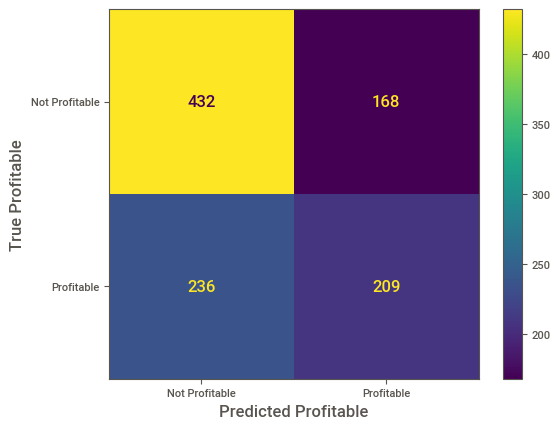

In [90]:
class_labels = ['Not Profitable', 'Profitable']
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat1, display_labels = class_labels)
cm_display.plot()
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [91]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       600
           1       0.55      0.47      0.51       445

    accuracy                           0.61      1045
   macro avg       0.60      0.59      0.59      1045
weighted avg       0.61      0.61      0.61      1045



### 2. Decision Trees Model

In [92]:
model2 = DecisionTreeClassifier(random_state=40,min_samples_leaf=8)

In [93]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=8, random_state=40)

In [94]:
pred2 = model2.predict(X_test)

In [95]:
confusion_matrix(y_test, pred2)

array([[391, 209],
       [266, 179]], dtype=int64)

In [96]:
cmat2 = confusion_matrix(y_test, pred2)

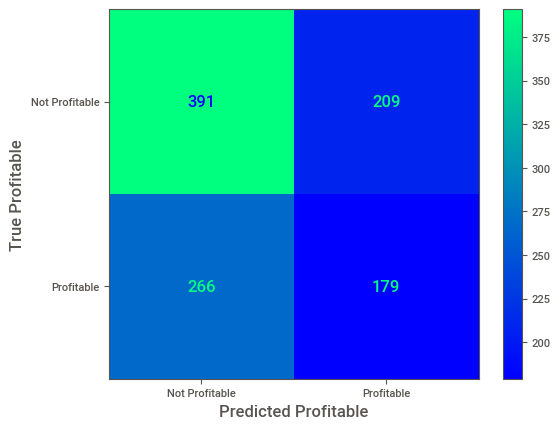

In [97]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat2, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [98]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       600
           1       0.46      0.40      0.43       445

    accuracy                           0.55      1045
   macro avg       0.53      0.53      0.53      1045
weighted avg       0.54      0.55      0.54      1045



### 3. Random Forest Model

In [99]:
model3 = RandomForestClassifier(n_estimators=100,min_samples_leaf=10, random_state=102)

In [100]:
model3.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=102)

In [101]:
pred3 = model3.predict(X_test)

In [102]:
confusion_matrix(y_test, pred3)

array([[446, 154],
       [256, 189]], dtype=int64)

In [103]:
cmat3 = confusion_matrix(y_test, pred3)

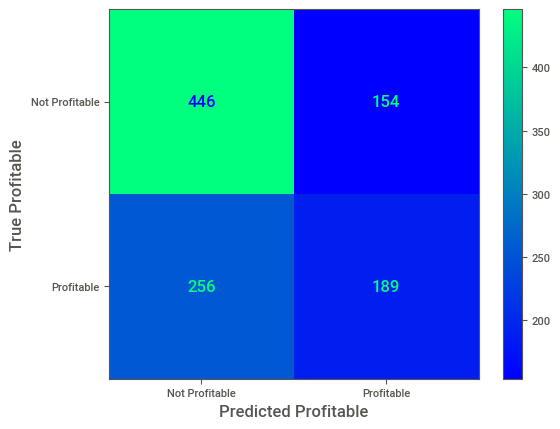

In [104]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat3, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [105]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.64      0.74      0.69       600
           1       0.55      0.42      0.48       445

    accuracy                           0.61      1045
   macro avg       0.59      0.58      0.58      1045
weighted avg       0.60      0.61      0.60      1045



### 4. Gradient Boosting Machines (GBM) Model

In [106]:
model4 = GradientBoostingClassifier()

In [107]:
model4.fit(X_train, y_train)

GradientBoostingClassifier()

In [108]:
pred4 = model4.predict(X_test)

In [109]:
confusion_matrix(y_test, pred4)

array([[434, 166],
       [233, 212]], dtype=int64)

In [110]:
cmat4 = confusion_matrix(y_test, pred4)

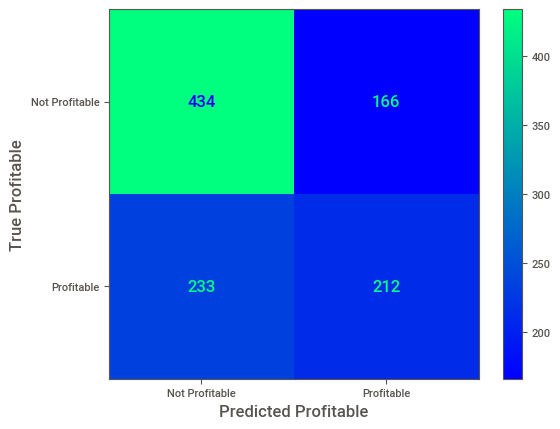

In [111]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat4, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [112]:
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.65      0.72      0.69       600
           1       0.56      0.48      0.52       445

    accuracy                           0.62      1045
   macro avg       0.61      0.60      0.60      1045
weighted avg       0.61      0.62      0.61      1045



### 5. Adaptive Boosting Machine (ADABoost) Model

In [113]:
model5 = AdaBoostClassifier()

In [114]:
model5.fit(X_train, y_train)

AdaBoostClassifier()

In [115]:
pred5 = model5.predict(X_test)

In [116]:
confusion_matrix(y_test, pred5)

array([[430, 170],
       [234, 211]], dtype=int64)

In [117]:
cmat5 = confusion_matrix(y_test, pred5)

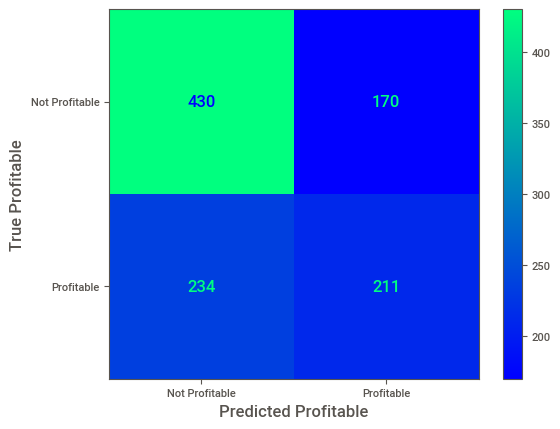

In [118]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat5, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [119]:
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       600
           1       0.55      0.47      0.51       445

    accuracy                           0.61      1045
   macro avg       0.60      0.60      0.60      1045
weighted avg       0.61      0.61      0.61      1045



### 6. Support Vector Machines (SVM) Model

In [120]:
model6 = SVC()

In [121]:
model6.fit(X_train, y_train)

SVC()

In [122]:
pred6 = model6.predict(X_test)

In [123]:
confusion_matrix(y_test, pred6)

array([[451, 149],
       [257, 188]], dtype=int64)

In [124]:
cmat6 = confusion_matrix(y_test, pred6)

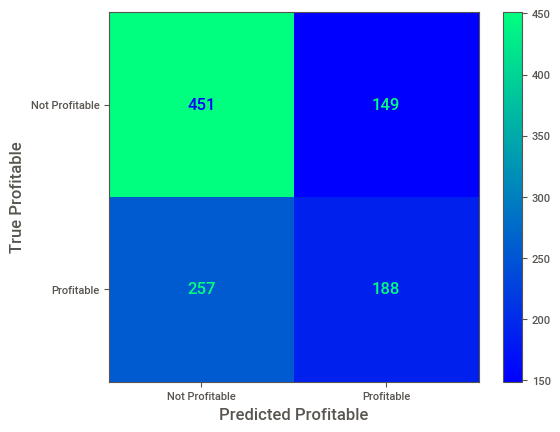

In [125]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat6, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [126]:
print(classification_report(y_test, pred6))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       600
           1       0.56      0.42      0.48       445

    accuracy                           0.61      1045
   macro avg       0.60      0.59      0.59      1045
weighted avg       0.60      0.61      0.60      1045



### 7. Extreme Gradient Boosting (XGB) Model

In [127]:
model7 = XGBClassifier()

In [128]:
model7.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
pred7 = model7.predict(X_test)

In [130]:
confusion_matrix(y_test, pred7)

array([[407, 193],
       [236, 209]], dtype=int64)

In [131]:
cmat7 = confusion_matrix(y_test, pred7)

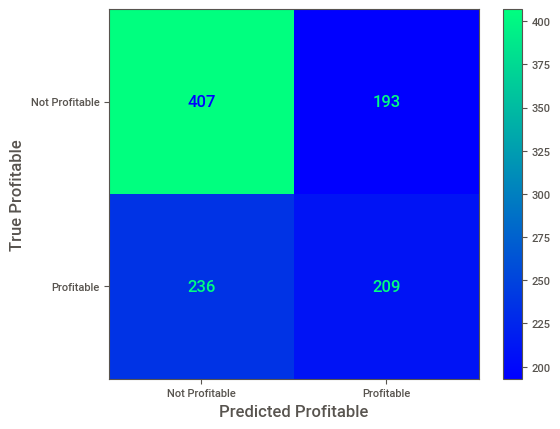

In [132]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = cmat7, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [133]:
print(classification_report(y_test, pred7))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65       600
           1       0.52      0.47      0.49       445

    accuracy                           0.59      1045
   macro avg       0.58      0.57      0.57      1045
weighted avg       0.58      0.59      0.59      1045



### Comparing the performances of the models

In [134]:
# Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=40,min_samples_leaf=8),
    "RandomForest": RandomForestClassifier(n_estimators=100,min_samples_leaf=10, random_state=102),
    "ADABoost": AdaBoostClassifier(),
    "GBM": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "XGB": XGBClassifier()
}   

In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score

In [136]:
# Initializing the summary table
results_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "Log-Loss", "AUC"])

In [137]:
results_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      0 non-null      object
 1   Accuracy   0 non-null      object
 2   Precision  0 non-null      object
 3   Recall     0 non-null      object
 4   F1-Score   0 non-null      object
 5   Log-Loss   0 non-null      object
 6   AUC        0 non-null      object
dtypes: object(7)
memory usage: 124.0+ bytes


In [138]:
# Evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    logloss = log_loss(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    new_row_data = {
        "Model": name, 
        "Accuracy": accuracy, 
        "Precision": precision, 
        "Recall": recall, 
        "F1-Score": f1, 
        "Log-Loss": logloss, 
        "AUC": auc
    }
    
    # Convert the data to a DataFrame
    new_row_df = pd.DataFrame([new_row_data])

    # Append the new row using concat
    results_table = pd.concat([results_table, new_row_df], ignore_index=True)

results_table.sort_values(by="Accuracy", ascending=False, inplace=True)
results_table.reset_index(drop=True, inplace=True)

In [139]:
results_table

Model  Accuracy  Precision    Recall  F1-Score  Log-Loss  \
0                  GBM  0.618182   0.560847  0.476404  0.515188  0.656215   
1             ADABoost  0.613397   0.553806  0.474157  0.510896  0.691528   
2  Logistic Regression  0.613397   0.554377  0.469663  0.508516  0.645482   
3                  SVM  0.611483   0.557864  0.422472  0.480818  0.657162   
4         RandomForest  0.607656   0.551020  0.424719  0.479695  0.666334   
5                  XGB  0.589474   0.519900  0.469663  0.493506  0.842192   
6        Decision Tree  0.545455   0.461340  0.402247  0.429772  5.882516   

        AUC  
0  0.638687  
1  0.618388  
2  0.655419  
3  0.635004  
4  0.618685  
5  0.579820  
6  0.536478

The metric which we consider to be the most important for this research is 'Precision' for the 1 prediction (which is shown in the scores values in the table). This metric gives the percentage of the True Positive predictions out of the total Positive predictions, True and False. This topic is further discussed in the 'Appendix'.

The table shows us that the GBM is the best performer on this metric.

We'll try to see if there is a way to improve this model's performance by tuning its hyperparameters. For this purpose we'll use the GridSearchCV technique.

### GridSearchCV (Cross Validation)

### Tuning GBM

Procesing the following cell takes long time..... go and have a good cup of coffee... 

In [140]:
# Defining the Gradient Boosting Classifier
gbm = GradientBoostingClassifier()

# Defining the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
 }

# Performing GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 0.6220095693779905


##### Applying the hyperparameters suggested by the GridSearchCV to the GBM model we used

In [141]:
modGBMsug = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)

In [142]:
modGBMsug.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [143]:
modpred4 = modGBMsug.predict(X_test)

In [144]:
confusion_matrix(y_test, modpred4)

array([[505,  95],
       [287, 158]], dtype=int64)

In [145]:
modcmat4 = confusion_matrix(y_test, modpred4)

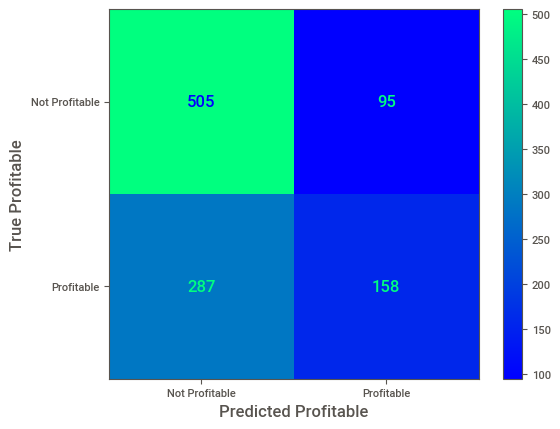

In [146]:
class_labels = ['Not Profitable', 'Profitable']
cmap = 'winter'
cm_display = ConfusionMatrixDisplay(confusion_matrix = modcmat4, display_labels = class_labels)
cm_display.plot(cmap=cmap, values_format='.4g')
plt.xlabel('Predicted Profitable')
plt.ylabel('True Profitable')
plt.show()

In [147]:
print(classification_report(y_test, modpred4))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       600
           1       0.62      0.36      0.45       445

    accuracy                           0.63      1045
   macro avg       0.63      0.60      0.59      1045
weighted avg       0.63      0.63      0.61      1045



The hyperparameters tuning improved the precision of predicting 1 from 56% to 62%.

#### *Getting the importance order of the features*

In [148]:
importances = modGBMsug.feature_importances_
features = list(X_train.columns)

# Get the indices that would sort the importances array
indices = np.argsort(importances)[::-1]

# Print the features in order of importance
for i in indices:
    print(f"{features[i]}: {importances[i]}")


Ticker_encoded: 0.5386287195811366
Crossover: 0.29508714656751783
Net Profit Margin: 0.0378879290541339
Long-term Debt / Capital: 0.028663409835040825
quarter: 0.024531450842393176
Close: 0.018618423667977852
MA50: 0.016503306966248413
Gross Margin: 0.0081774901751702
Volume: 0.007710253882580701
Operating Margin: 0.0063610157795864165
Days Sales In Receivables: 0.004695216666906523
Debt/Equity Ratio: 0.0036521961551200244
Current Ratio: 0.003124461922634332
Asset Turnover: 0.0030071664787638735
ROE - Return On Equity: 0.002848630648296531
Return On Tangible Equity: 0.0005031817764928338
Receiveable Turnover: 0.0
Inventory Turnover Ratio: 0.0



## <font color='red'>Our selected model is:
<font color='red'>**modGBMsug = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100)**

#### Saving the model for future predictions

In [149]:
# Saving the model to a file by using 'joblib'
joblib.dump(modGBMsug, 'V2GBMmodel.pkl')

['V2GBMmodel.pkl']


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


<a id="there_you_go_14"></a>
## <font color='blue'>*Conclusion and summary*

Selecting the best ML model for the prediction of profitable crossover events concludes the main part of this research, which we defined as:

***Can our model be used for a given “crossover event” of a specific stock, based on the company’s ratios in the dataset which we used to train the model, for predicting profitable trades?***

None of the models we tried performs with results which can be clearly described as “very good”. All of them show overall accuracy levels of between 0.55 to 0.62 and the best precision level (which is the main interest for us) of 0.62.

In the Appendix we showed that the model predicts the profitable events (the correctly predicted ones as well as the wrongly predicted) and creates a set of possible trades, which even with the wrong ones (those which actually resulting losing trades), ***is with an average profit that is significantly different from the population’s mean (which would result a loss).***

Nevertheless, even with the “promising” result in the Appendix, one needs to note the following facts before practically applying this model:

<br>1.	The source dataset spans over a calendar period from January 2005 to October 2020 with 2 gaps of about 1 year each so it is actually about 14 years. It included 321 stocks out of which only 257 were used in this research.

<br>2.	The total number of crossover events which occurred is 4,385 out of which less than 50% were profitable (1,909 according to the criteria we used, and it will change according to revised criteria).

<br>3.	These figures mean:<br>a.That for any stock, on average, there were less than 10 profitable crossovers in 14 years, or less than one per stock per year. Or,<br>b. That each year there were about 140 profitable events, about 12 per month.

<br>4.	As we talk about statistics, it means that we have to get large number of trades for it to “work well”. More stocks have to be screened for such events and the application should be for a lengthy period of time.

This research may be extended to further checking of more aspects or options in order to improve the model’s performance, like:

<br>a.	Selecting better financial ratios
<br>b.	Training the ML model only on the profitable events
<br>c.	Changing the criteria for being profitable
<br>d.	Applying Neural Networks Model

<br>We’ll leave this for the future…


# The End 😊🙏


<font color='green'>***<a href=#there_you_go_20>
    <font color='green'>Back to Content
    <span class="icon">&#9198;</span>
</a>***


[<font color='purple'>**Go to the Appendix notebook**](Profitable_Trades_Predictions_by_MA50_&_MA200_Crossovers_Appendix.ipynb)

<a id="there_you_go_30"></a>
**Viewing the plot**

**[Back to the code](#there_you_go_31)**

In [150]:
# Plotting the 'Profitable' portion (shown by average as the values for 'Profitable' are 1) for each stock ('Ticker')
sns.set(rc = {'figure.figsize':(60,320)})
sns.set(font_scale = 4)
sns.barplot(data=clean_cross_df,x='Profitable',y='Ticker')

<Axes: xlabel='Profitable', ylabel='Ticker'>

**[Back to the code](#there_you_go_31)**